# **Problem Statement**

##Context

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you may expect — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighborhood and based on gathered data you will try to assess your house price.

##Objective

Take advantage of all of the feature variables available below, use it to analyse and predict house prices.

##Data Description

1. cid: a notation for a house
2. dayhours: Date house was sold
3. price: Price is prediction target
4. room_bed: Number of Bedrooms/House
5. room_bath: Number of bathrooms/bedrooms
6. living_measure: square footage of the home
7. lot_measure: quare footage of the lot
8. ceil: Total floors (levels) in house
9. coast: House which has a view to a waterfront
10. sight: Has been viewed
11. condition: How good the condition is (Overall)
12. quality: grade given to the housing unit, based on grading system
13. ceil_measure: square footage of house apart from basement
14. basement_measure: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21. lot_measure15: lotSize area in 2015(implies-- some renovations)
22. furnished: Based on the quality of room
23. total_area: Measure of both living and lot

# **Importing the necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **Loading the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Read the data
df = pd.read_excel('/content/drive/MyDrive/PGPDSA/innercity.xlsx')
#returns first 5 rows
df.head(5)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.000,1.750,3050.000,9440.000,1,0,0.000,3,8.000,1800.000,1250.000,1966,0,98034,47.723,-122.183,2020.000,8660.000,0.000,12490
1,3145600250,20150317T000000,190000,2.000,1.000,670.000,3101.000,1,0,0.000,4,6.000,670.000,0.000,1948,0,98118,47.555,-122.274,1660.000,4100.000,0.000,3771
2,7129303070,20140820T000000,735000,4.000,2.750,3040.000,2415.000,2,1,4.000,3,8.000,3040.000,0.000,1966,0,98118,47.519,-122.256,2620.000,2433.000,0.000,5455
3,7338220280,20141010T000000,257000,3.000,2.500,1740.000,3721.000,2,0,0.000,3,8.000,1740.000,0.000,2009,0,98002,47.336,-122.213,2030.000,3794.000,0.000,5461
4,7950300670,20150218T000000,450000,2.000,1.000,1120.000,4590.000,1,0,0.000,3,7.000,1120.000,0.000,1924,0,98118,47.566,-122.285,1120.000,5100.000,0.000,5710


In [4]:
df1=df.copy()

###Understanding how data was collected in terms of time, frequency, and methodology

In [5]:
df["dayhours"] = pd.to_datetime(df["dayhours"].astype(str).str[:8], format="%Y%m%d")

In [6]:
min_date = df["dayhours"].min()
max_date = df["dayhours"].max()

In [7]:
monthly_sales = df["dayhours"].dt.to_period("M").value_counts().sort_index()

In [8]:
print(f"First recorded sale: {min_date}")
print(f"Last recorded sale: {max_date}")
print("\nMonthly sales count:\n", monthly_sales.head())

First recorded sale: 2014-05-02 00:00:00
Last recorded sale: 2015-05-27 00:00:00

Monthly sales count:
 dayhours
2014-05    1768
2014-06    2180
2014-07    2211
2014-08    1940
2014-09    1774
Freq: M, Name: count, dtype: int64


In [9]:
monthly_sales

,count
dayhours,
2014-05,1768
2014-06,2180
2014-07,2211
2014-08,1940
2014-09,1774
2014-10,1878
2014-11,1411
2014-12,1471
2015-01,978


# **Data Overview**

###1. Structure of Data

In [10]:
df.shape

(21613, 23)

###2. Type of Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  int64         
 1   dayhours          21613 non-null  datetime64[ns]
 2   price             21613 non-null  int64         
 3   room_bed          21505 non-null  float64       
 4   room_bath         21505 non-null  float64       
 5   living_measure    21596 non-null  float64       
 6   lot_measure       21571 non-null  float64       
 7   ceil              21571 non-null  object        
 8   coast             21612 non-null  object        
 9   sight             21556 non-null  float64       
 10  condition         21556 non-null  object        
 11  quality           21612 non-null  float64       
 12  ceil_measure      21612 non-null  float64       
 13  basement          21612 non-null  float64       
 14  yr_built          2161

###3. Missing values treatment

In [12]:
df.isnull().sum()

,0
cid,0
dayhours,0
price,0
room_bed,108
room_bath,108
living_measure,17
lot_measure,42
ceil,42
coast,1
sight,57


###4. Data Duplicates

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

###5. Eliminate irrelevant columns

* cid is system generated IDs which is irrelevant for a prediction model
* zipcode, lat and long represents spatial characteristics, it's irrelevant for a regression model




In [15]:
df.drop(['cid','zipcode','lat','long'],axis=1,inplace=True)

###6. Statistical Summary

In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
dayhours,21613,2014-10-29 04:38:01.959931392,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21613.000,540182.159,75000.000,321950.000,450000.000,645000.000,7700000.000,367362.232
room_bed,21505.000,3.371,0.000,3.000,3.000,4.000,33.000,0.930
room_bath,21505.000,2.115,0.000,1.750,2.250,2.500,8.000,0.770
living_measure,21596.000,2079.861,290.000,1429.250,1910.000,2550.000,13540.000,918.496
lot_measure,21571.000,15104.583,520.000,5040.000,7618.000,10684.500,1651359.000,41423.619
sight,21556.000,0.234,0.000,0.000,0.000,0.000,4.000,0.766
quality,21612.000,7.657,1.000,7.000,7.000,8.000,13.000,1.175
ceil_measure,21612.000,1788.367,290.000,1190.000,1560.000,2210.000,9410.000,828.103
basement,21612.000,291.523,0.000,0.000,0.000,560.000,4820.000,442.581


In [17]:
df.describe(include=["object"]).T

,count,unique,top,freq
ceil,21571,7,1,10647
coast,21612,3,0,21421
condition,21556,6,3,13978
yr_built,21612,117,2014,559
total_area,21584,11145,$,39


In [18]:
df.columns

Index(['dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area'],
      dtype='object')

##Insights

* The dayhours column contains datetime values, which might require conversion for analysis.
* Missing values are present as the count of observations varies across columns.
* price has a high standard deviation (~367,362), indicating a wide range of values and possible outliers.
* lot_measure and lot_measure15 have large maximum values compared to their 75th percentile, suggesting potential extreme values.
* The furnished column has a mean of 0.197, indicating that a small proportion of properties are furnished.

##Data Preprocessing

Some of the column has an unknown value like $. We can choose to impute null values for now and then do missing value treatment

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          21613 non-null  datetime64[ns]
 1   price             21613 non-null  int64         
 2   room_bed          21505 non-null  float64       
 3   room_bath         21505 non-null  float64       
 4   living_measure    21596 non-null  float64       
 5   lot_measure       21571 non-null  float64       
 6   ceil              21571 non-null  object        
 7   coast             21612 non-null  object        
 8   sight             21556 non-null  float64       
 9   condition         21556 non-null  object        
 10  quality           21612 non-null  float64       
 11  ceil_measure      21612 non-null  float64       
 12  basement          21612 non-null  float64       
 13  yr_built          21612 non-null  object        
 14  yr_renovated      2161

In [20]:
df['coast'].value_counts()

,count
coast,
0,21421
1,161
$,30


In [21]:
df['ceil'].value_counts()

,count
ceil,
1,10647
2,8210
1.500,1905
3,610
2.500,161
$,30
3.500,8


In [22]:


df['condition'].value_counts()

,count
condition,
3,13978
4,5655
5,1694
2,171
1,30
$,28


In [23]:
df['yr_built'].value_counts()

,count
yr_built,
2014,559
2006,454
2005,450
2004,433
2003,421
...,...
1901,29
1902,27
1935,24


In [24]:
df['total_area'].value_counts()

,count
total_area,
$,39
9060,19
7330,19
5940,19
8750,19
...,...
63597,1
5461,1
3771,1


In [25]:
df['coast'].replace({'$':np.nan},inplace=True)

In [26]:
df['ceil'].replace({'$':np.nan},inplace=True)

In [27]:
df['condition'].replace({'$':np.nan},inplace=True)

In [28]:
df['yr_built'].replace({'$':np.nan},inplace=True)

In [29]:
df['total_area'].replace({'$':np.nan},inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          21613 non-null  datetime64[ns]
 1   price             21613 non-null  int64         
 2   room_bed          21505 non-null  float64       
 3   room_bath         21505 non-null  float64       
 4   living_measure    21596 non-null  float64       
 5   lot_measure       21571 non-null  float64       
 6   ceil              21541 non-null  float64       
 7   coast             21582 non-null  float64       
 8   sight             21556 non-null  float64       
 9   condition         21528 non-null  float64       
 10  quality           21612 non-null  float64       
 11  ceil_measure      21612 non-null  float64       
 12  basement          21612 non-null  float64       
 13  yr_built          21598 non-null  float64       
 14  yr_renovated      2161

Transform date columns into the number of days elapsed from today.

dayhours

In [31]:
current_date = pd.Timestamp.today()

# Calculate days since the house was sold
df["days_since_sold"] = (current_date - pd.to_datetime(df["dayhours"])).dt.days

yr_built

In [32]:
current_year = datetime.today().year

# Subtract the column values from the current year to calculate age
df["house_age"] = current_year - df["yr_built"]

yr_renovated

In [33]:
df["renovated_since"]=np.where(df["yr_renovated"] == 0,
                           0,
                           current_year - df["yr_renovated"])

Drop all these date columns

In [34]:
df.drop(['dayhours','yr_built','yr_renovated'],axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  int64  
 1   room_bed          21505 non-null  float64
 2   room_bath         21505 non-null  float64
 3   living_measure    21596 non-null  float64
 4   lot_measure       21571 non-null  float64
 5   ceil              21541 non-null  float64
 6   coast             21582 non-null  float64
 7   sight             21556 non-null  float64
 8   condition         21528 non-null  float64
 9   quality           21612 non-null  float64
 10  ceil_measure      21612 non-null  float64
 11  basement          21612 non-null  float64
 12  living_measure15  21447 non-null  float64
 13  lot_measure15     21584 non-null  float64
 14  furnished         21584 non-null  float64
 15  total_area        21545 non-null  float64
 16  days_since_sold   21613 non-null  int64 

### Missing value treatment

In [36]:
print("The percentage of data retained after dropping all rows with null values is:", (len(df.dropna())/len(df))*100)

The percentage of data retained after dropping all rows with null values is: 98.63508073844446


Only 1.36% of the data is lost after dropping rows with missing values, it is an acceptable trade-off to ensure data quality and consistency.

Since the loss is minimal (only ~1.36%), it is reasonable to drop the rows instead of imputing missing values, which might introduce bias or incorrect assumptions.

In [37]:
df=df.dropna()

In [38]:
df.isnull().sum()

,0
price,0
room_bed,0
room_bath,0
living_measure,0
lot_measure,0
ceil,0
coast,0
sight,0
condition,0
quality,0


###Outlier Check

In [39]:
df[(df['room_bed'] >= 10)]

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,days_since_sold,house_age,renovated_since
2209,650000,10.000,2.000,3610.000,11914.000,2.000,0.000,0.000,4.000,7.000,3010.000,600.000,2040.000,11914.000,0.000,15524.000,3811,67.000,0
2557,660000,10.000,3.000,2920.000,3745.000,2.000,0.000,0.000,4.000,7.000,1860.000,1060.000,1810.000,3745.000,0.000,6665.000,3750,112.000,0
14140,1150000,10.000,5.250,4590.000,10920.000,1.000,0.000,2.000,3.000,9.000,2500.000,2090.000,2730.000,10400.000,1.000,15510.000,3887,17.000,0
16913,640000,33.000,1.750,1620.000,6000.000,1.000,0.000,0.000,5.000,7.000,1040.000,580.000,1330.000,4700.000,0.000,7620.000,3937,78.000,0
20972,520000,11.000,3.000,3000.000,4960.000,2.000,0.000,0.000,3.000,7.000,2400.000,600.000,1420.000,4960.000,0.000,7960.000,3880,107.000,26


* Most residential houses have 3 to 5 bedrooms.
* A house with 10+ bedrooms is extremely rare and likely a data entry error.
* Removing them ensures a cleaner dataset for training.

In [40]:
df=df[df['room_bed'] < 10]

In [41]:
df[(df['room_bath'] >= 10)]

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,days_since_sold,house_age,renovated_since


In [42]:
len(df.columns)

19

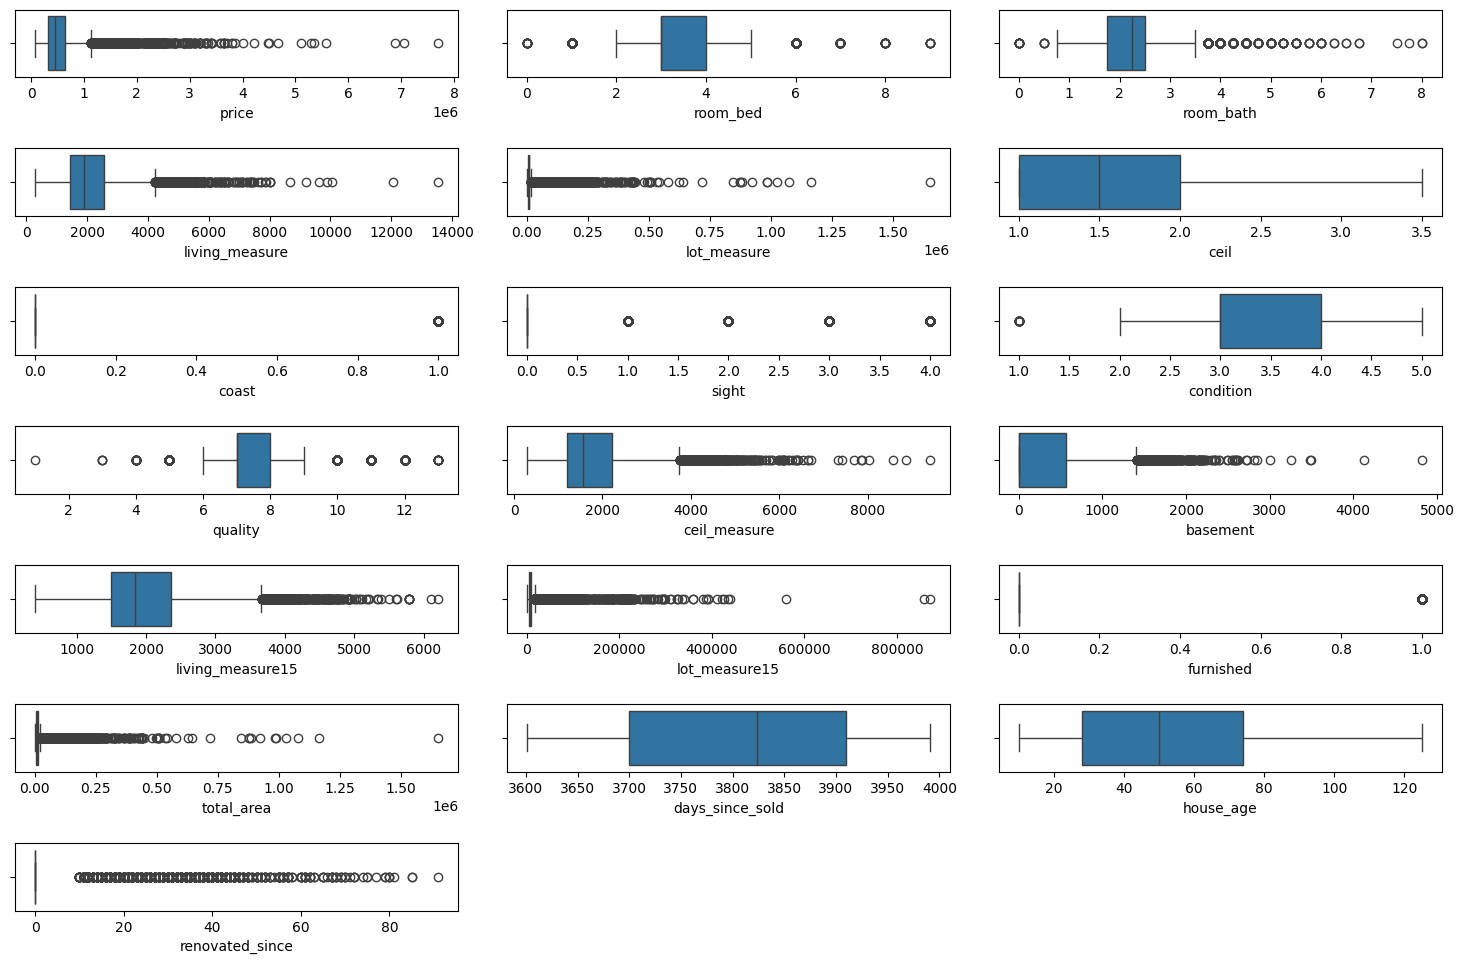

In [43]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(7, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

However, not all outliers should be removed because some might represent actual, valid data points rather than errors.

###Statistical Summary

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21313.000,540231.160,368173.135,75000.000,321000.000,450000.000,645000.000,7700000.000
room_bed,21313.000,3.368,0.903,0.000,3.000,3.000,4.000,9.000
room_bath,21313.000,2.115,0.770,0.000,1.750,2.250,2.500,8.000
living_measure,21313.000,2080.155,918.952,290.000,1430.000,1910.000,2550.000,13540.000
lot_measure,21313.000,15103.093,41405.709,520.000,5040.000,7620.000,10682.000,1651359.000
ceil,21313.000,1.495,0.540,1.000,1.000,1.500,2.000,3.500
coast,21313.000,0.007,0.086,0.000,0.000,0.000,0.000,1.000
sight,21313.000,0.235,0.766,0.000,0.000,0.000,0.000,4.000
condition,21313.000,3.409,0.651,1.000,3.000,3.000,4.000,5.000
quality,21313.000,7.658,1.177,1.000,7.000,7.000,8.000,13.000


Insights

* The dataset now has a uniform count across all columns, suggesting missing values were handled.
* Standard deviations for features like lot_measure15 and price remain high, indicating variability in property sizes and prices.
* The coast feature has a very low mean (~0.007), indicating that only a small number of properties are located near the coast.
* quality has a mean of 7.658 and a relatively small standard deviation (1.177), suggesting most properties have similar quality ratings.
* basement has a mean of 291.151 but a minimum of 0, meaning many properties do not have a basement.

# **Exploratory Data Analysis**

In [45]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.set_title(f'Distribution of {feature}')

In [46]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    ax.set_title(f'Distribution of {feature}')
    plt.show()  # show the plot

In [47]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Stacked Bar Plot of {predictor} vs {target}')
    plt.show()

In [48]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Distribution and Boxplots of {predictor} with respect to {target}', fontsize=16)


    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21313 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21313 non-null  int64  
 1   room_bed          21313 non-null  float64
 2   room_bath         21313 non-null  float64
 3   living_measure    21313 non-null  float64
 4   lot_measure       21313 non-null  float64
 5   ceil              21313 non-null  float64
 6   coast             21313 non-null  float64
 7   sight             21313 non-null  float64
 8   condition         21313 non-null  float64
 9   quality           21313 non-null  float64
 10  ceil_measure      21313 non-null  float64
 11  basement          21313 non-null  float64
 12  living_measure15  21313 non-null  float64
 13  lot_measure15     21313 non-null  float64
 14  furnished         21313 non-null  float64
 15  total_area        21313 non-null  float64
 16  days_since_sold   21313 non-null  int64  
 17

###Univariate Analysis

#### Observations on coast

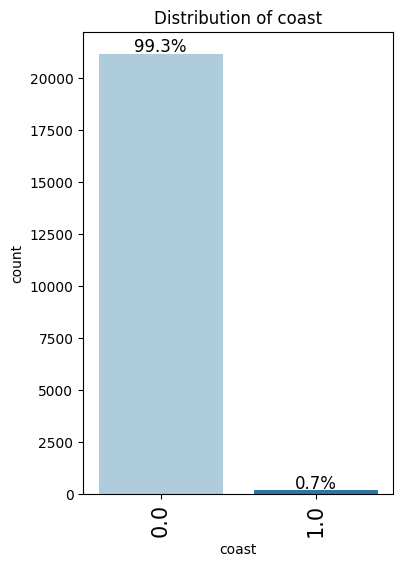

In [50]:
labeled_barplot(df, "coast", perc=True)

#### Observations on ceil

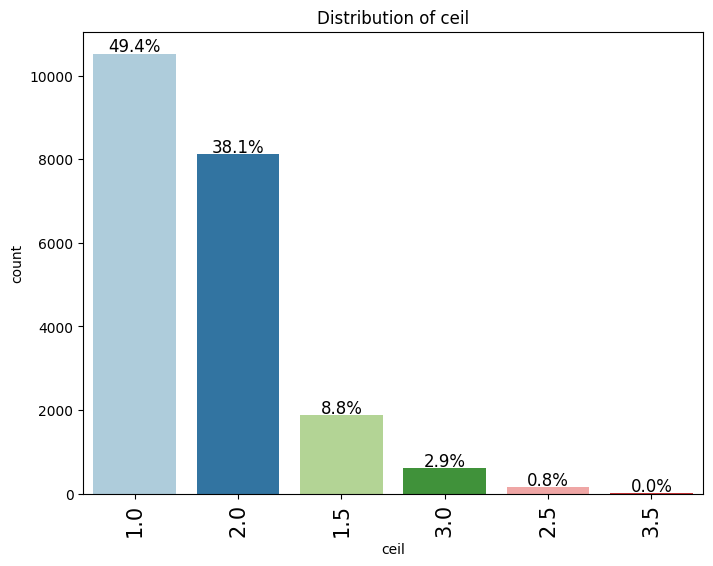

In [51]:
labeled_barplot(df, "ceil", perc=True)

#### Observations on condition

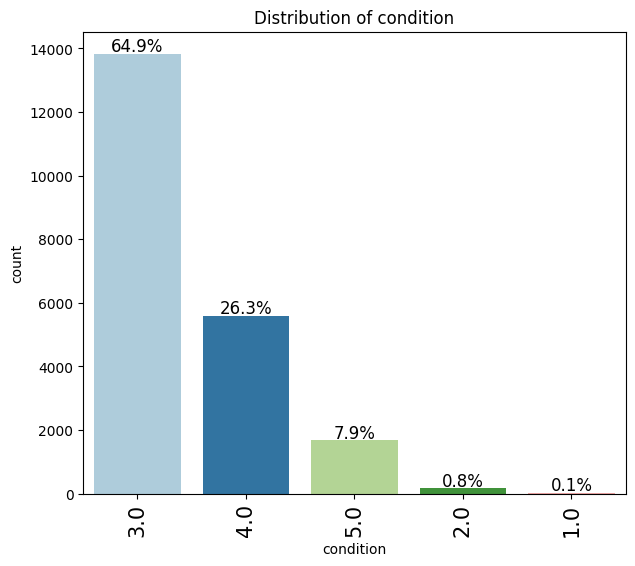

In [52]:
labeled_barplot(df, "condition", perc=True)

#### Observations on sight

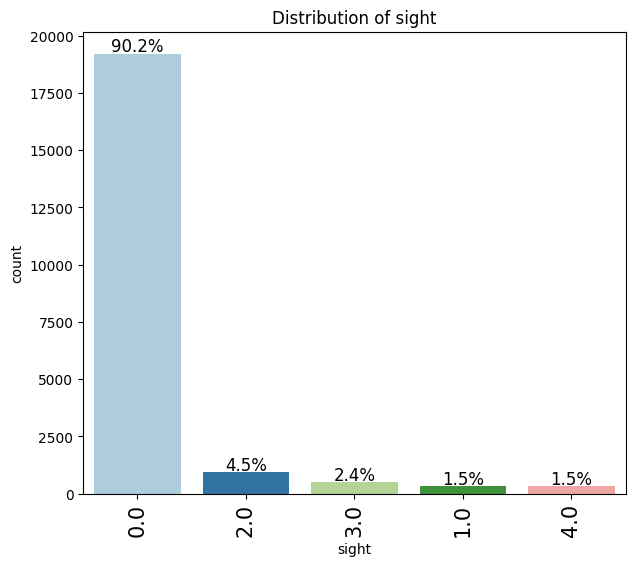

In [53]:
labeled_barplot(df, "sight", perc=True)

#### Observations on quality

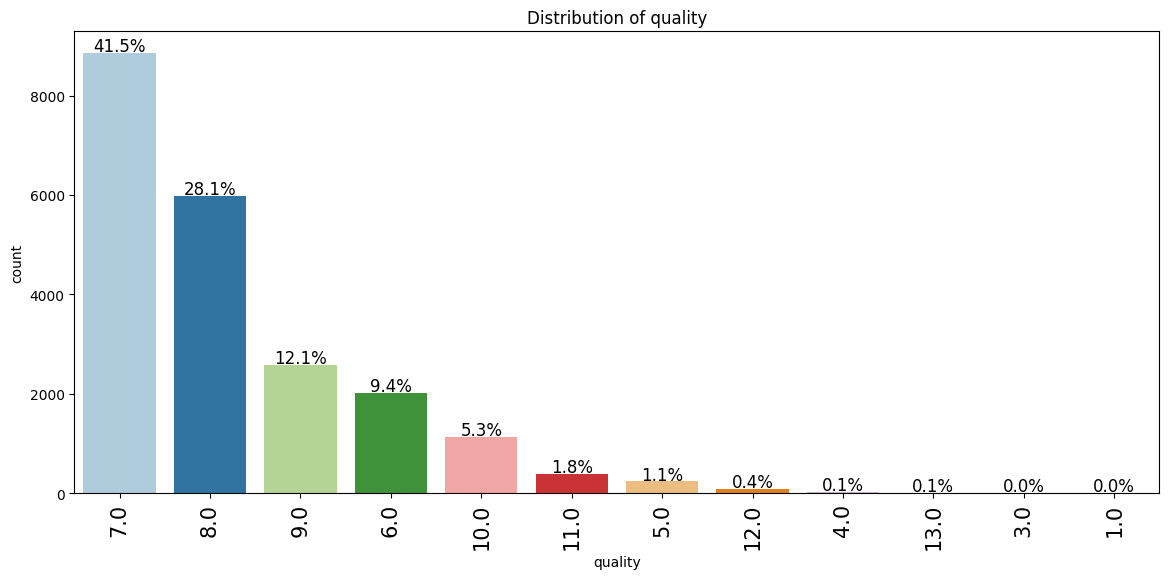

In [54]:
labeled_barplot(df, "quality", perc=True)

#### Observations on furnished

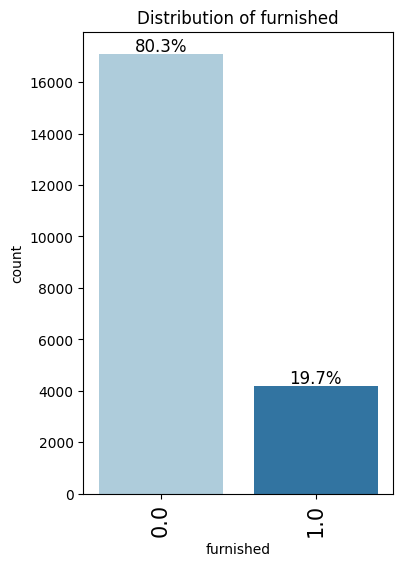

In [55]:
labeled_barplot(df, "furnished", perc=True)

#### Observations on Price

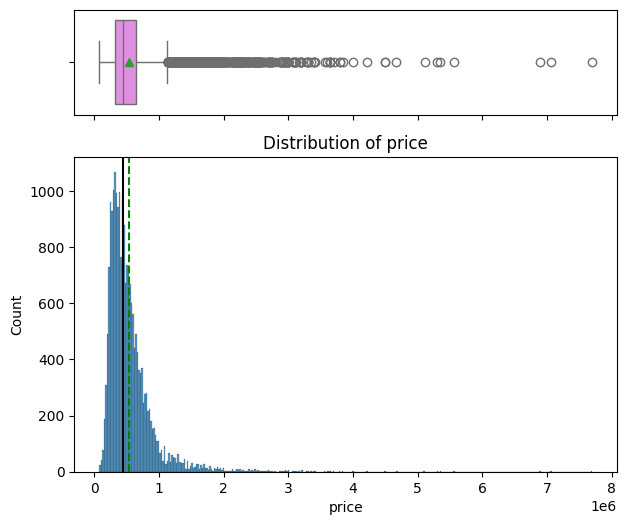

In [56]:
histogram_boxplot(df, "price",figsize=(7,6))

#### Observations on room_bed

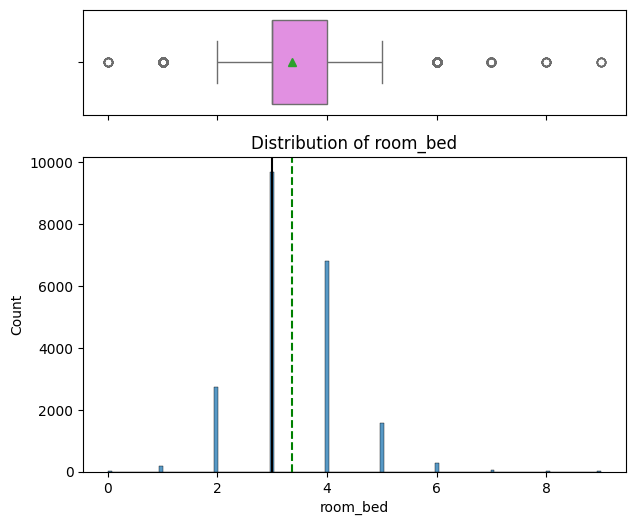

In [57]:
histogram_boxplot(df, "room_bed",figsize=(7,6))

#### Observations on room_bath

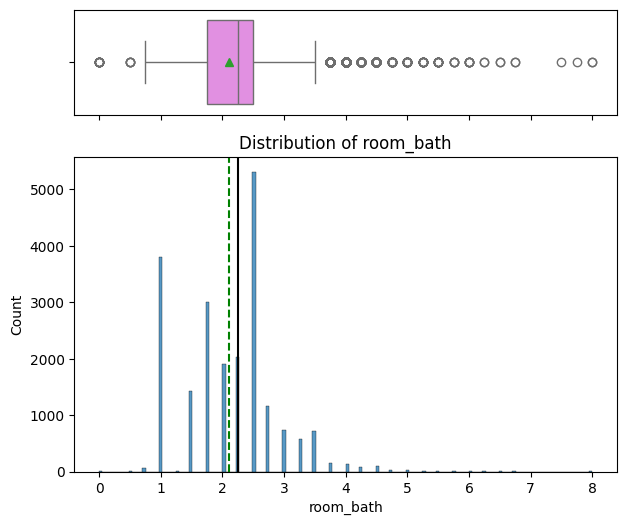

In [58]:
histogram_boxplot(df, "room_bath",figsize=(7,6))

#### Observations on living_measure

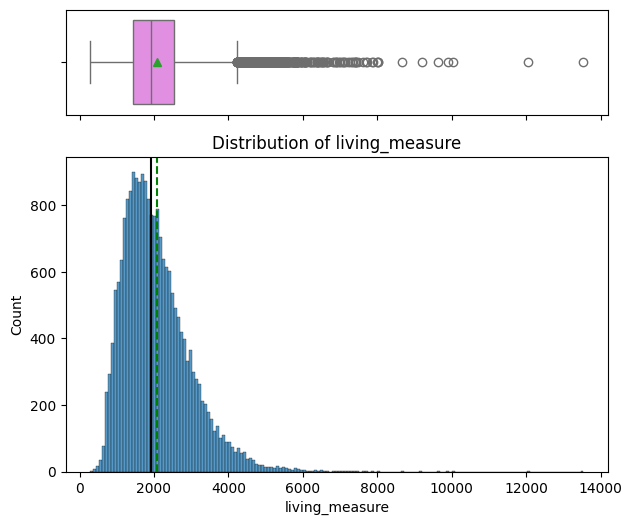

In [59]:
histogram_boxplot(df, "living_measure",figsize=(7,6))

#### Observations on lot_measure

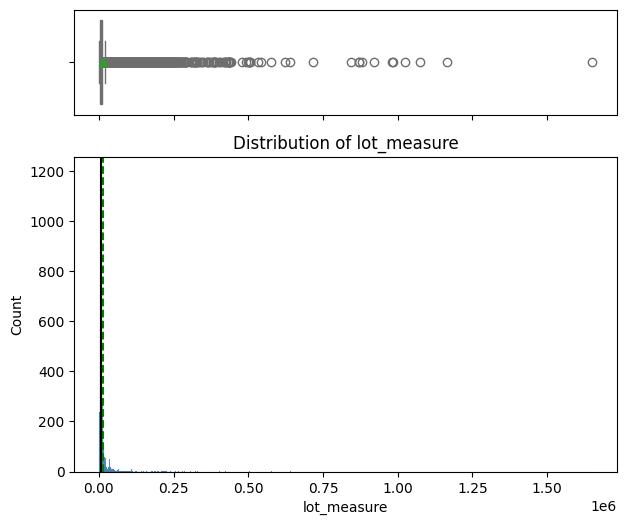

In [60]:
histogram_boxplot(df, "lot_measure",figsize=(7,6))

#### Observations on ceil_measure

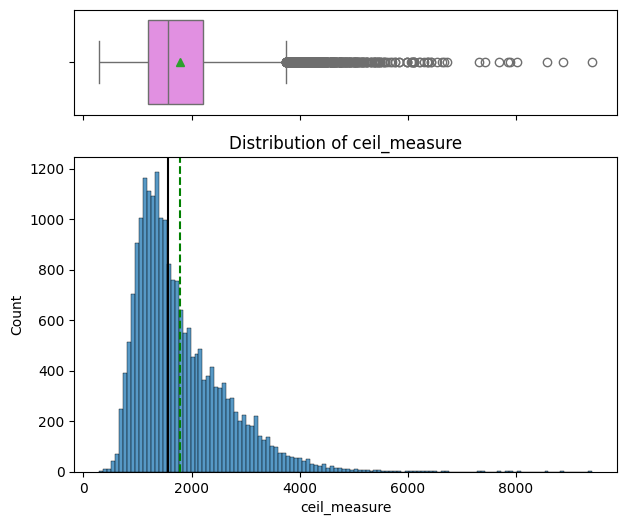

In [61]:
histogram_boxplot(df, "ceil_measure",figsize=(7,6))

#### Observations on basement

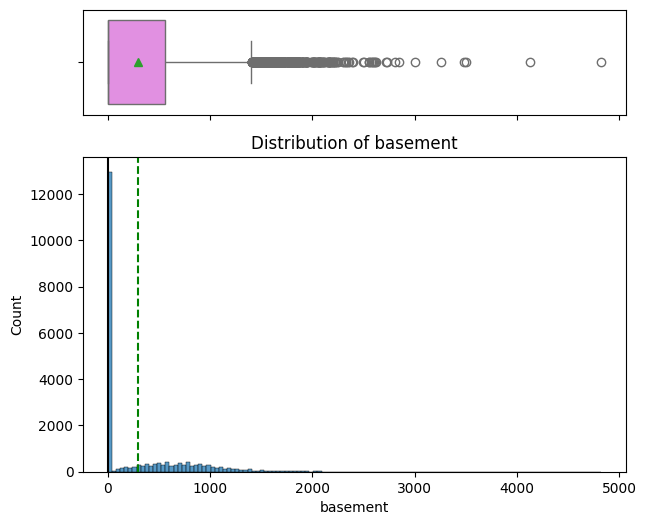

In [62]:
histogram_boxplot(df, "basement",figsize=(7,6))

#### Observations on lot_measure15

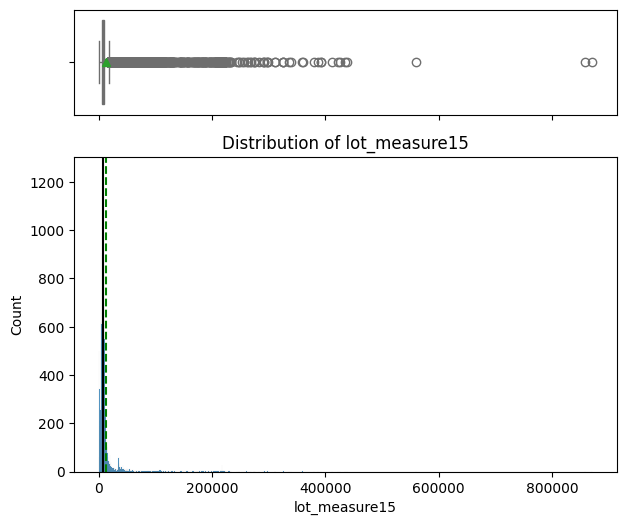

In [63]:
histogram_boxplot(df, "lot_measure15",figsize=(7,6))

#### Observations on living_measure15




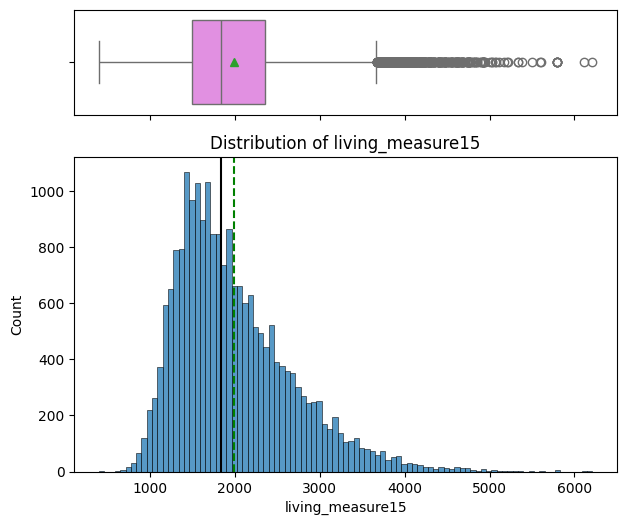

In [64]:
histogram_boxplot(df, "living_measure15",figsize=(7,6))

#### Observations on total_area


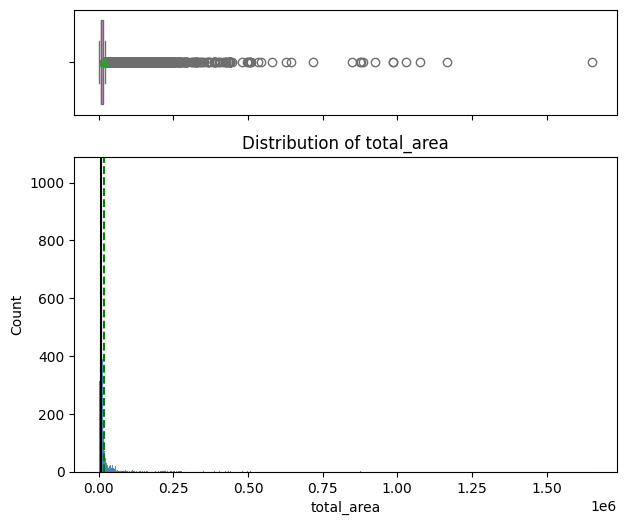

In [65]:
histogram_boxplot(df, "total_area",figsize=(7,6))

###Bivariate Analysis

In [66]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

In [67]:
cols_list

['price',
 'room_bed',
 'room_bath',
 'living_measure',
 'lot_measure',
 'ceil',
 'coast',
 'sight',
 'condition',
 'quality',
 'ceil_measure',
 'basement',
 'living_measure15',
 'lot_measure15',
 'furnished',
 'total_area',
 'days_since_sold',
 'house_age',
 'renovated_since']

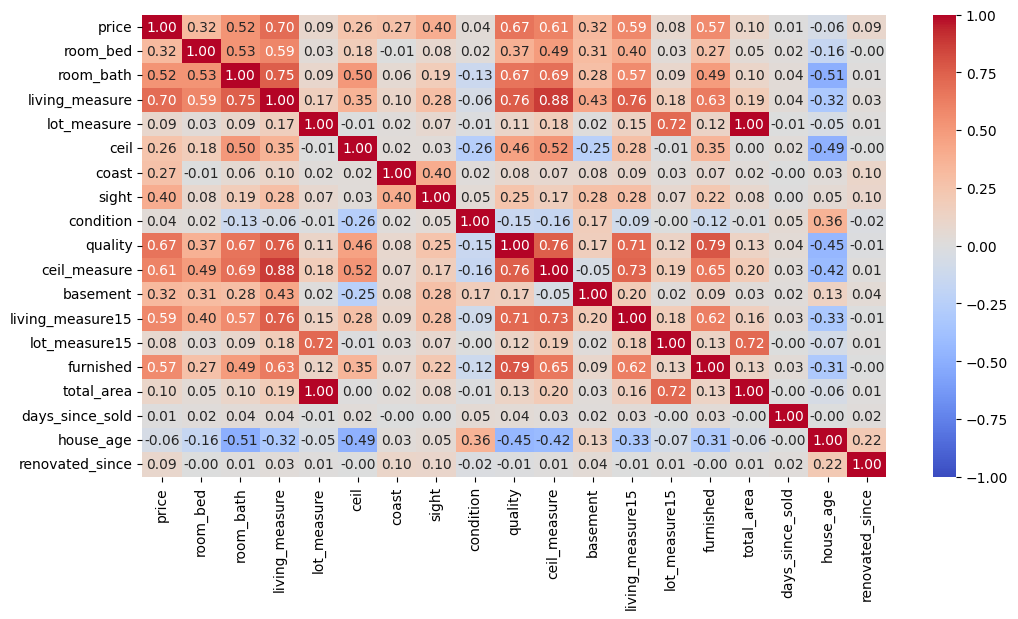

In [68]:

plt.figure(figsize=(12, 6))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm"
)
plt.show()

In [69]:
df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'days_since_sold', 'house_age', 'renovated_since'],
      dtype='object')

###Insights

1. Strong Positive Correlations
* Price vs. Living Measure (0.70) & Quality (0.67)
Larger living spaces and better quality homes tend to have higher prices.
* Living Measure vs. Living Measure 15 (0.76)
Homes with larger interior spaces often exist in neighborhoods with similarly large houses.
* Furnished vs. Living Measure (0.63)
Larger homes are more likely to be furnished.
* Ceil Measure vs. Living Measure (0.88)
Homes with higher ceilings tend to have larger living areas.

2. Moderate Positive Correlations
* Price vs. Room Bath (0.52) & Room Bed (0.32)
More bedrooms and bathrooms generally increase the house price.
* Basement vs. Living Measure (0.43)
Homes with basements tend to have more living space.
* Lot Measure vs. Lot Measure 15 (0.72)
Large lots are typically found in neighborhoods with similarly large lots.

3. Negative Correlations
* House Age vs. Room Bath (-0.51)
Older homes tend to have fewer bathrooms.
* Ceil Measure vs. House Age (-0.42)
Older homes typically have lower ceilings.
* Quality vs. House Age (-0.45)
Newer homes tend to have higher quality ratings.

4. Weak Correlations
* Condition vs. Price (0.04)
Property condition does not have a strong impact on price.
* Sight vs. Price (0.40)
Having a scenic view has a mild impact on house price.
* Renovated Since vs. Price (0.09)
Recent renovations do not significantly impact price.

####House price vs Living area

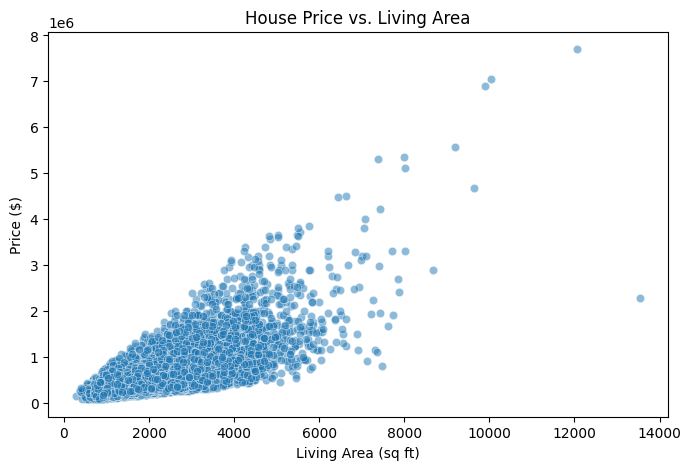

In [70]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["living_measure"], y=df["price"], alpha=0.5)
plt.xlabel("Living Area (sq ft)")
plt.ylabel("Price ($)")
plt.title("House Price vs. Living Area")
plt.show()

###Insights

1. There's a positive correlation between living area and house price - as living area increases, house prices generally increase as well.
2. The data points form a somewhat triangular or fan shape, indicating increasing variance in price as living area increases.
3. Most properties are concentrated in the smaller living area range (below 4,000 sq ft).
4. There are some high-priced outliers, particularly in the 10,000-12,000 sq ft range.
5. There's one property with an unusually large living area (around 14,000 sq ft) but with a relatively moderate price (around $2.5 million).

####House price vs Plot Size

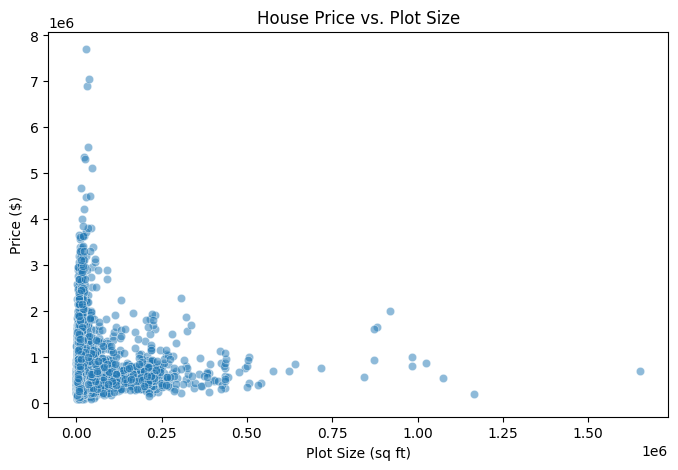

In [71]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["lot_measure"], y=df["price"], alpha=0.5)
plt.xlabel("Plot Size (sq ft)")
plt.ylabel("Price ($)")
plt.title("House Price vs. Plot Size")
plt.show()

###Insights

* Unusual Distribution Pattern: Unlike the living area plot, the relationship between plot size and price shows a very different pattern. There's a concentration of higher-priced properties with smaller plot sizes (under 250,000 sq ft).
* Decreasing Trend with Outliers: The highest-priced properties (above $5 million) all have relatively small plot sizes, which is somewhat counterintuitive to what might be expected.
* Sparse Data at Larger Plot Sizes: Properties with plot sizes above 500,000 sq ft are much less common and don't necessarily command higher prices.
* Inverse Relationship at the Extremes: Some of the largest plots (over 1 million sq ft) actually have moderate to low prices, suggesting that very large land parcels may be in less desirable locations or have development limitations.
* Density Concentration: The vast majority of properties have plot sizes under 250,000 sq ft, with prices ranging from very low to the highest in the dataset.

####House price vs Sight

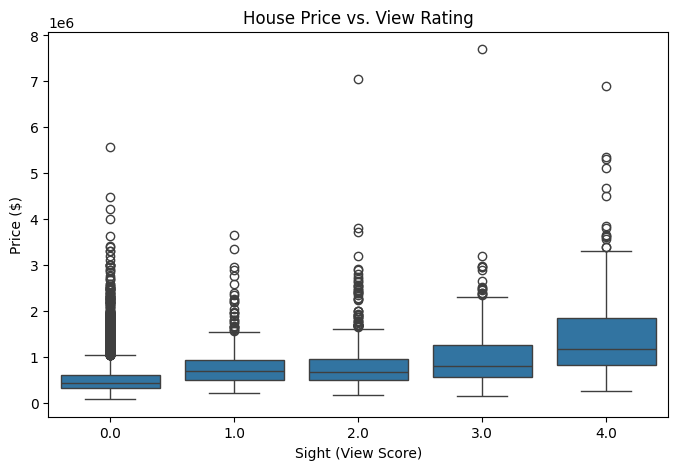

In [72]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["sight"], y=df["price"])
plt.xlabel("Sight (View Score)")
plt.ylabel("Price ($)")
plt.title("House Price vs. View Rating")
plt.show()

###Insights

* View ratings range from 0 to 4, with clear price escalation as view quality improves
* Properties with the highest view rating (4) show significantly higher median prices (~1.2 million) compared to properties with no view (0)
* Consistent pattern of increasing median prices across all view rating categories
* Wide price variability exists within each view category, particularly for ratings 0 and 4
* Premium properties ($5-7.7 million) exist across different view ratings, suggesting view is important but not the sole determinant of luxury pricing
* Box plot shows fewer properties with view ratings 3-4, indicating these premium views are less common
* Properties with rating 0 (no view) have the largest number of outliers, showing some high-value properties don't require views to command premium prices

####House price vs Number of Bedrooms

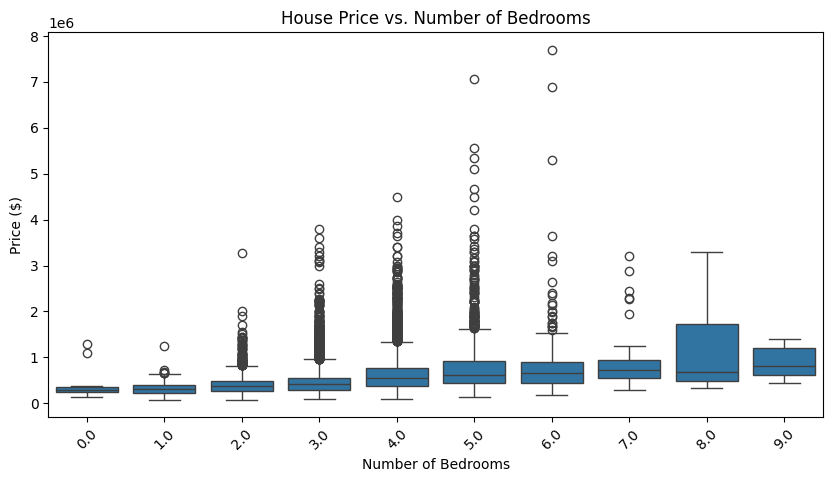

In [73]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["room_bed"], y=df["price"])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price ($)")
plt.title("House Price vs. Number of Bedrooms")
plt.xticks(rotation=45)
plt.show()

###Insights

* Bedroom counts range from 0 to 9, with a positive correlation between number of bedrooms and house price
* Median price consistently increases from 0 to 5 bedrooms, with 5-bedroom homes showing the highest median price
* Homes with 5 bedrooms contain the most high-value outliers, including the maximum price of $7.7 million
* Unusual pattern for very large homes (7-9 bedrooms), showing higher median prices but fewer extreme outliers than 5-bedroom homes
* The largest number of properties have 3-4 bedrooms, forming the core of the market
* Studios/0-bedroom properties are uncommon and generally command the lowest prices
* Wide price variability exists particularly in the 3-5 bedroom range, suggesting other factors significantly impact pricing
* Price distributions for 8-9 bedroom homes show a higher minimum price threshold, suggesting these are predominantly premium properties

####House price vs Quality Grade

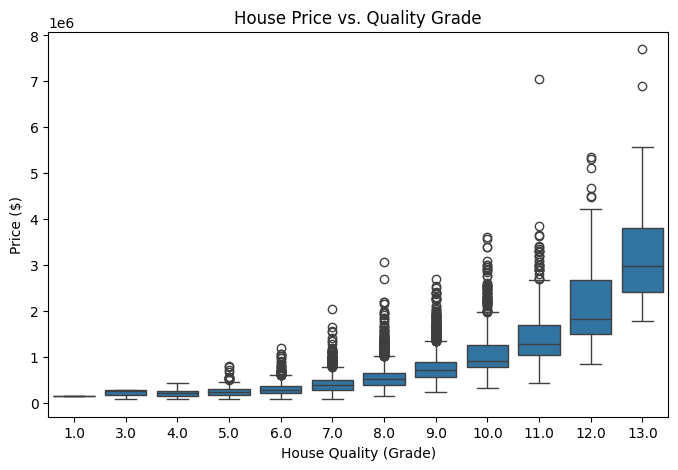

In [74]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["quality"], y=df["price"])
plt.xlabel("House Quality (Grade)")
plt.ylabel("Price ($)")
plt.title("House Price vs. Quality Grade")
plt.show()

###Insights

* Quality grades range from 1 to 13, showing the strongest correlation with price among all variables examined
* Nearly perfect step-wise progression of median prices as quality grade increases
* Highest quality homes (grade 13) have median prices around 3 million, compared to under 200,000 for lowest grades
* Premium properties (5-7.7 million) appear exclusively in the highest quality grades (11-13)
* Box plots show increasingly wider price ranges for higher-quality homes, indicating greater variability at premium levels
* Most properties fall in the middle quality range (7-10), forming the core market
* Very low quality grades (1-3) are rare and command the lowest prices
Quality grade appears to be one of the most significant price determinants, with clear separation between grade categories
* The highest-value outliers (7-7.7 million) appear in the top three quality grades, confirming luxury market relationship

####House price vs Furnished

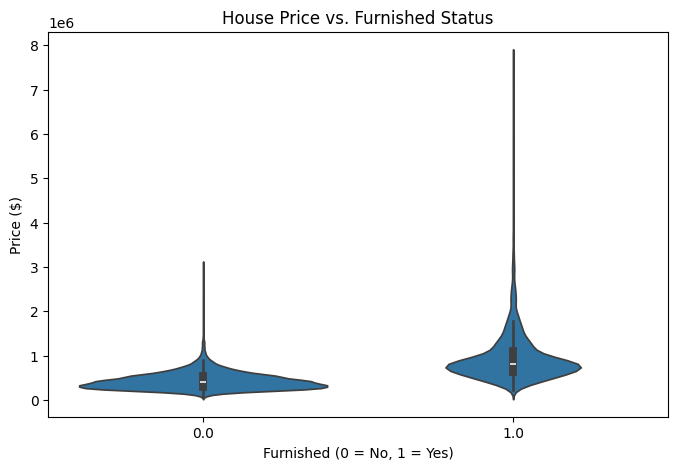

In [75]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df["furnished"], y=df["price"])
plt.xlabel("Furnished (0 = No, 1 = Yes)")
plt.ylabel("Price ($)")
plt.title("House Price vs. Furnished Status")

plt.show()

###Insights

* Price Variability: Furnished houses exhibit a significantly wider range of prices, including high outliers, compared to unfurnished houses, indicating a potential premium market.
* Median Price Trend: The median price for furnished houses appears slightly higher than that of unfurnished houses, suggesting a general price advantage for furnished properties.
* Distribution Skewness: Furnished house prices are positively skewed, with a long tail towards higher prices, highlighting the presence of very expensive furnished properties.
* Outlier Prevalence: Furnished houses have more frequent and extreme price outliers, suggesting specific factors dramatically influence the price of certain furnished homes.
* Market Segmentation: The distinct price distributions imply that furnished and unfurnished houses may cater to different buyer segments, with furnished properties potentially attracting those seeking move-in-ready luxury.

####Number of House sales per month

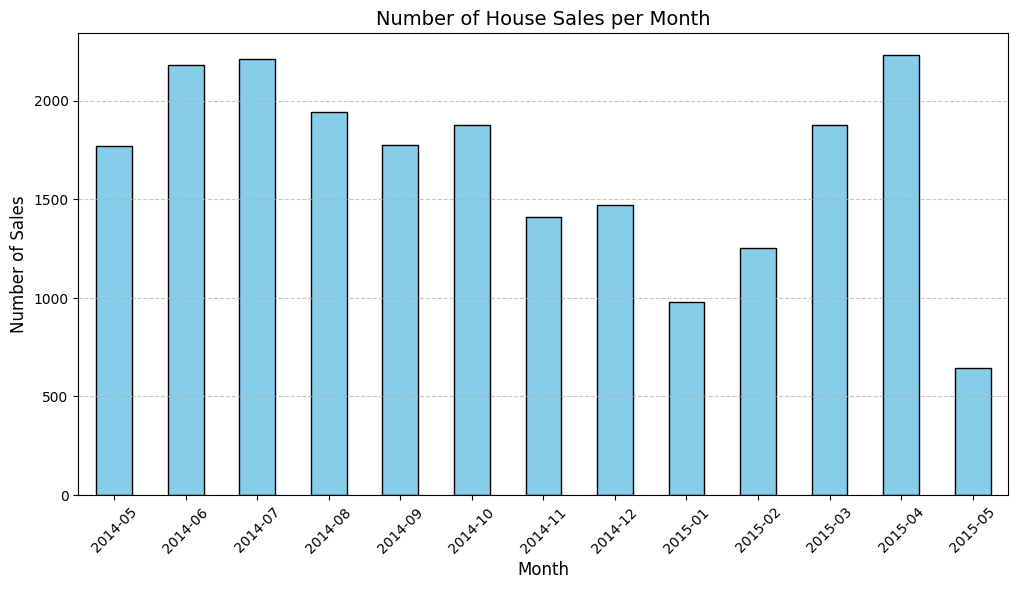

In [76]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Number of House Sales per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

###Insights

* Strong Seasonal Pattern: House sales exhibit a clear seasonal pattern, with higher sales during spring and early summer (May-July) and lower sales during fall and winter (January-February).
* Peak Sales Months: June and July of 2014, and April of 2015, represent peak sales periods, indicating the most active times for the real estate market.
* Lowest Sales Period: January and February of 2015 show the lowest sales volume, suggesting a slow market during these winter months.
* Mid-Year Sales Dip: A noticeable dip in sales occurs in late summer and early fall (August-October), potentially due to factors like vacations or the start of the school year.
* Potential Market Shift: The significant drop in sales from April to May 2015 warrants further investigation, as it may indicate a market change or specific influencing events.

As we are not trying to predict the trend, this might not be relevant for regression.

####House Price vs Days Since Sold

In [77]:
df['days_since_sold'].min()

3601

In [78]:
df['days_since_sold'].max()

3991

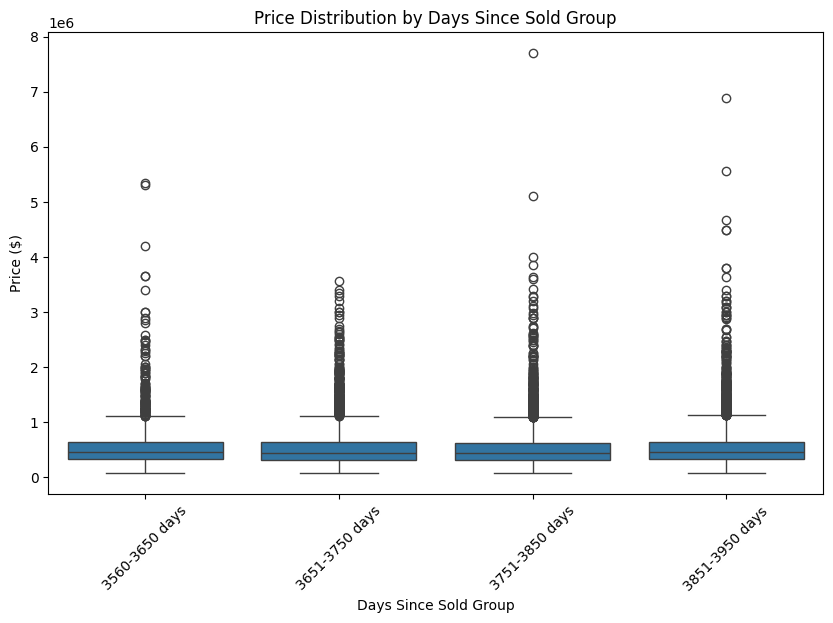

In [79]:
bins = [3560, 3650, 3750, 3850, 3950]  # Adjust as needed
labels = ['3560-3650 days', '3651-3750 days', '3751-3850 days', '3851-3950 days']

# Create a new categorical column
df['days_sold_group'] = pd.cut(df['days_since_sold'], bins=bins, labels=labels)

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='days_sold_group', y='price')
plt.title("Price Distribution by Days Since Sold Group")
plt.xlabel("Days Since Sold Group")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()

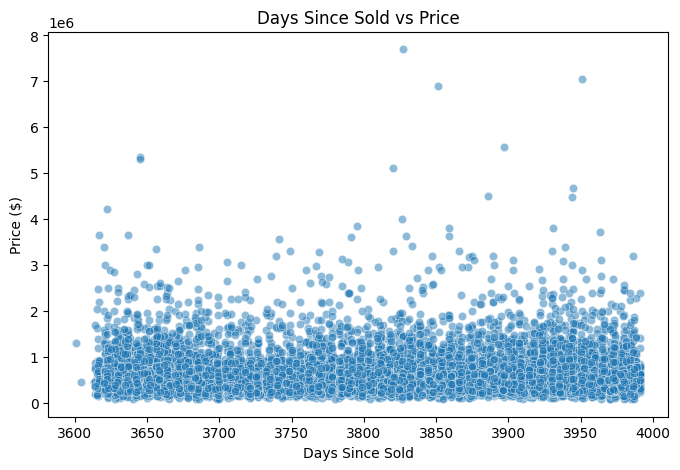

In [80]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='days_since_sold', y='price', alpha=0.5)
plt.title("Days Since Sold vs Price")
plt.xlabel("Days Since Sold")
plt.ylabel("Price ($)")
plt.show()

###Insights

* Weak Influence of "Days Since Sold": Both visualizations indicate that "Days Since Sold" (within the 10-year range) has a negligible effect on house prices.
* Price Range Consistency: The box plot and scatter plot show that house prices remain stable across different "Days Since Sold" groups, suggesting other factors have a greater impact.
* Significant Outliers: High-price outliers appear in all groups, likely driven by factors such as location, size, or luxury features rather than time since sold.
* Dominance of Other Factors: The primary drivers of house prices are likely location, size, condition, amenities, and market conditions, rather than "Days Since Sold."
* Lack of Correlation: The scatter plot and box plot confirm no clear relationship between "Days Since Sold" and house prices.

####House Price vs House Age

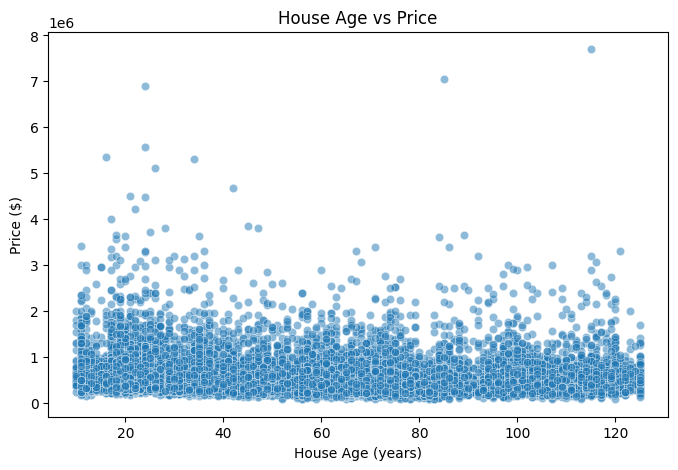

In [81]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='house_age', y='price', alpha=0.5)
plt.title("House Age vs Price")
plt.xlabel("House Age (years)")
plt.ylabel("Price ($)")
plt.show()

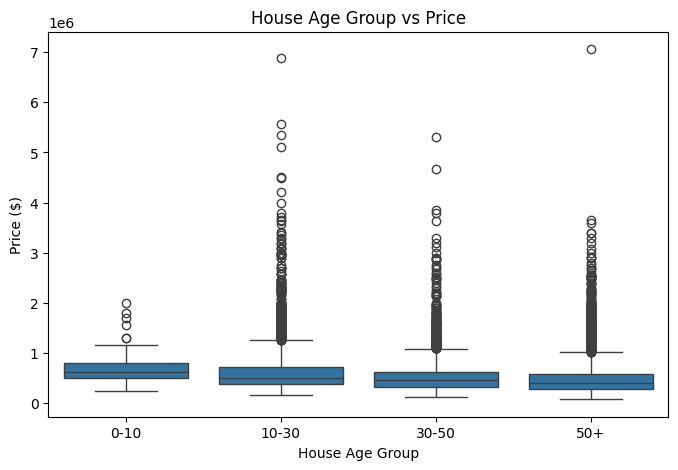

In [82]:
df['age_group'] = pd.cut(df['house_age'], bins=[0, 10, 30, 50, 100], labels=['0-10', '10-30', '30-50', '50+'])

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='age_group', y='price')
plt.title("House Age Group vs Price")
plt.xlabel("House Age Group")
plt.ylabel("Price ($)")
plt.show()

In [83]:
df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'days_since_sold', 'house_age', 'renovated_since',
       'days_sold_group', 'age_group'],
      dtype='object')

###Insights

* Weak Correlation: The scatter plot shows little to no correlation between "House Age (years)" and "Price," with points scattered randomly.
* Price Range Consistency: House prices vary widely regardless of age, suggesting age alone is not a significant determinant of price.
* Concentration of Lower Prices: Most houses are priced below $2 million, regardless of their age.
* Outliers at Higher Prices: Some houses have significantly higher prices, likely influenced by factors such as size, location, or luxury features rather than age.
* No Obvious Trend: The scatter plot lacks a clear pattern, confirming that "House Age" does not have a strong impact on price.

####House Price vs Years since renovation

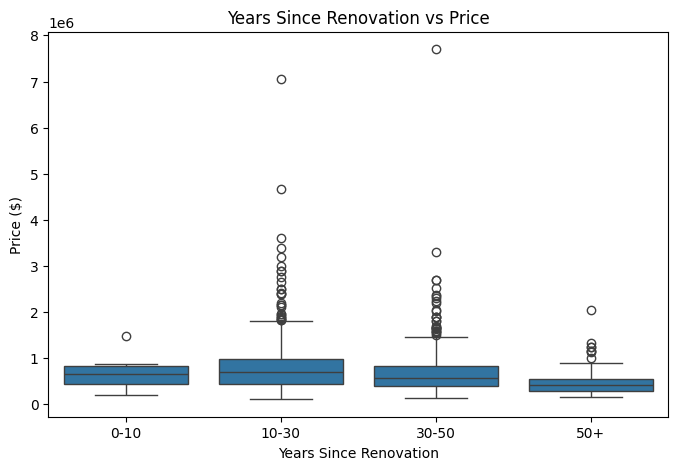

In [84]:
df['renovation_group'] = pd.cut(df['renovated_since'], bins=[0, 10, 30, 50, 100], labels=['0-10', '10-30', '30-50', '50+'])

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='renovation_group', y='price')
plt.title("Years Since Renovation vs Price")
plt.xlabel("Years Since Renovation")
plt.ylabel("Price ($)")
plt.show()

###Insights

* Price Increase with Recent Renovations: Houses renovated 10-30 years ago show higher median prices and a wider price distribution compared to those renovated within the last 10 years.
* Price Decrease with Older Renovations: Houses renovated 30-50+ years ago have lower median prices and a narrower price range, indicating diminished value over time.
* Outliers in Older Renovation Groups: The "10-30" and "30-50" years since renovation groups have more high-price outliers, suggesting some houses retain significant value despite older renovations.
* Lower Price Variability for Recently Renovated: The "0-10" years since renovation group has a smaller IQR and fewer outliers, indicating more consistent pricing.
* Potential for Renovation Depreciation: The decline in price and narrower distribution in older renovation groups suggests that renovation value may depreciate over time or fail to meet modern market expectations.

In [85]:
df=df.drop(columns=['days_sold_group','age_group','renovation_group'],axis=1)

#**KMeans Clustering**

In [86]:
cluster_df= df.drop(columns=['price'],axis=1)

In [87]:
features=cluster_df.columns

In [88]:
scaler = MinMaxScaler()
cluster_df[features] = scaler.fit_transform(cluster_df)

In [89]:
cluster_df

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,days_since_sold,house_age,renovated_since
0,0.444,0.219,0.208,0.005,0.000,0.000,0.000,0.500,0.583,0.166,0.259,0.279,0.009,0.000,0.007,0.077,0.426,0.000
1,0.222,0.125,0.029,0.002,0.000,0.000,0.000,0.750,0.417,0.042,0.000,0.217,0.004,0.000,0.001,0.182,0.583,0.000
2,0.444,0.344,0.208,0.001,0.400,1.000,1.000,0.500,0.583,0.302,0.000,0.382,0.002,0.000,0.002,0.718,0.426,0.000
3,0.333,0.312,0.109,0.002,0.400,0.000,0.000,0.500,0.583,0.159,0.000,0.281,0.004,0.000,0.002,0.587,0.052,0.000
4,0.222,0.125,0.063,0.002,0.000,0.000,0.000,0.500,0.500,0.091,0.000,0.124,0.005,0.000,0.003,0.251,0.791,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.444,0.312,0.214,0.036,0.400,0.000,0.000,0.500,0.667,0.311,0.000,0.410,0.050,1.000,0.038,0.200,0.165,0.000
21609,0.222,0.125,0.056,0.003,0.000,0.000,0.000,0.500,0.500,0.069,0.023,0.195,0.005,0.000,0.003,0.951,0.661,0.000
21610,0.333,0.469,0.258,0.021,0.400,0.000,0.000,0.500,0.750,0.287,0.166,0.343,0.039,1.000,0.022,0.677,0.322,0.000
21611,0.444,0.312,0.096,0.004,0.400,0.000,0.000,0.500,0.500,0.139,0.000,0.131,0.008,0.000,0.005,0.282,0.157,0.000


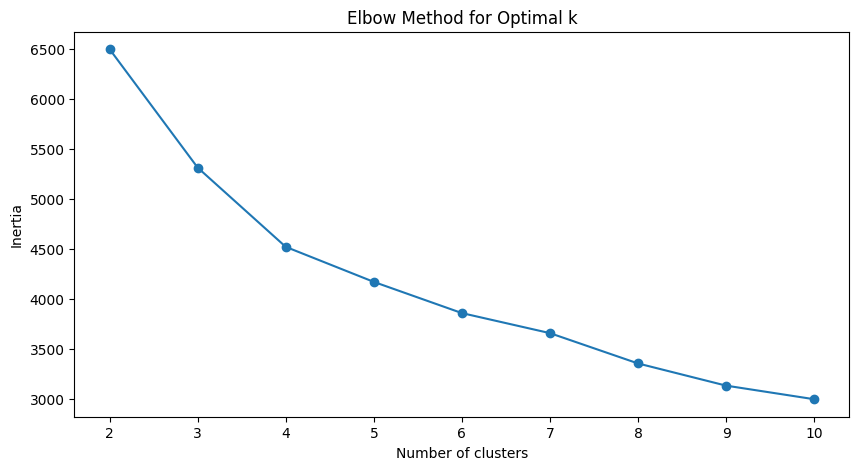

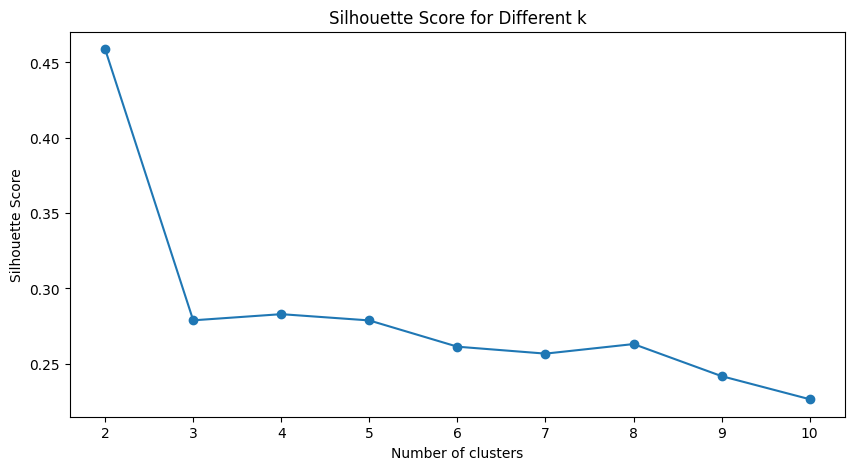

In [90]:


# Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_df, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()

Elbow Method:

Key Observations:
* Sharp drop from k=2 to k=4: A significant decrease in inertia, meaning clusters are becoming well-separated.
* Gradual decrease from k=5 onwards: The improvement diminishes after k=4, indicating a diminishing return in adding more clusters.
* Elbow point likely around k=4 or k=5: This suggests that using 4 or 5 clusters balances compactness and interpretability.

Conclusion:
* The optimal number of clusters appears to be k=4 or k=5.
* We can validate this further using the Silhouette Score to assess cluster quality.

Silhouette Score:

Key Observations:

* Highest silhouette score at k=2 (~0.46): This suggests that 2 clusters are the most well-defined.
* Slight improvement around k=4: The silhouette score stabilizes slightly at k=4, aligning with the elbow method’s suggestion.
* Declining trend for k > 5: Clusters become less well-separated, meaning over-segmentation might be happening.

Conclusion:

* k=2 gives the best-defined clusters, but it may be too simplistic.
* k=4 could be a balanced choice, offering segmentation without too much overlap.
* If interpretability matters, k=4 or k=5 is a reasonable choice.

In [91]:
k = 4  # Use the optimal k from Elbow/Silhouette method
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(cluster_df)


print(df['Cluster'].value_counts())

Cluster
2    6931
0    5349
1    4833
3    4200
Name: count, dtype: int64


In [92]:
df

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,days_since_sold,house_age,renovated_since,Cluster
0,600000,4.000,1.750,3050.000,9440.000,1.000,0.000,0.000,3.000,8.000,1800.000,1250.000,2020.000,8660.000,0.000,12490.000,3631,59.000,0,0
1,190000,2.000,1.000,670.000,3101.000,1.000,0.000,0.000,4.000,6.000,670.000,0.000,1660.000,4100.000,0.000,3771.000,3672,77.000,0,0
2,735000,4.000,2.750,3040.000,2415.000,2.000,1.000,4.000,3.000,8.000,3040.000,0.000,2620.000,2433.000,0.000,5455.000,3881,59.000,0,1
3,257000,3.000,2.500,1740.000,3721.000,2.000,0.000,0.000,3.000,8.000,1740.000,0.000,2030.000,3794.000,0.000,5461.000,3830,16.000,0,1
4,450000,2.000,1.000,1120.000,4590.000,1.000,0.000,0.000,3.000,7.000,1120.000,0.000,1120.000,5100.000,0.000,5710.000,3699,101.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,685530,4.000,2.500,3130.000,60467.000,2.000,0.000,0.000,3.000,9.000,3130.000,0.000,2780.000,44224.000,1.000,63597.000,3679,29.000,0,3
21609,535000,2.000,1.000,1030.000,4841.000,1.000,0.000,0.000,3.000,7.000,920.000,110.000,1530.000,4944.000,0.000,5871.000,3972,86.000,0,2
21610,998000,3.000,3.750,3710.000,34412.000,2.000,0.000,0.000,3.000,10.000,2910.000,800.000,2390.000,34412.000,1.000,38122.000,3865,47.000,0,3
21611,262000,4.000,2.500,1560.000,7800.000,2.000,0.000,0.000,3.000,7.000,1560.000,0.000,1160.000,7800.000,0.000,9360.000,3711,28.000,0,1


In [93]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

             price  room_bed  room_bath  living_measure  lot_measure  ceil  \
Cluster                                                                      
0       437125.922     3.207      1.717        1693.640    13960.101 1.134   
1       439172.579     3.355      2.462        2025.135    10779.814 2.077   
2       435234.324     3.207      1.723        1704.509    12987.866 1.138   
3       961102.376     3.856      2.868        3255.627    25024.261 1.874   

         coast  sight  condition  quality  ceil_measure  basement  \
Cluster                                                             
0        0.007  0.192      3.511    7.023      1359.916   333.724   
1        0.001  0.065      3.095    7.635      1938.756    86.379   
2        0.005  0.179      3.648    7.028      1353.725   350.784   
3        0.020  0.576      3.247    9.532      2881.468   374.159   

         living_measure15  lot_measure15  furnished  total_area  \
Cluster                                          

In [94]:
cluster_median = df.groupby("Cluster").median()
print(cluster_median)

             price  room_bed  room_bath  living_measure  lot_measure  ceil  \
Cluster                                                                      
0       399000.000     3.000      1.750        1620.000     7907.000 1.000   
1       414000.000     3.000      2.500        1970.000     5225.000 2.000   
2       399950.000     3.000      1.750        1640.000     7800.000 1.000   
3       810000.000     4.000      2.500        3110.000     9800.000 2.000   

         coast  sight  condition  quality  ceil_measure  basement  \
Cluster                                                             
0        0.000  0.000      3.000    7.000      1290.000     0.000   
1        0.000  0.000      3.000    8.000      1910.000     0.000   
2        0.000  0.000      4.000    7.000      1300.000     0.000   
3        0.000  0.000      3.000    9.000      2800.000     0.000   

         living_measure15  lot_measure15  furnished  total_area  \
Cluster                                          

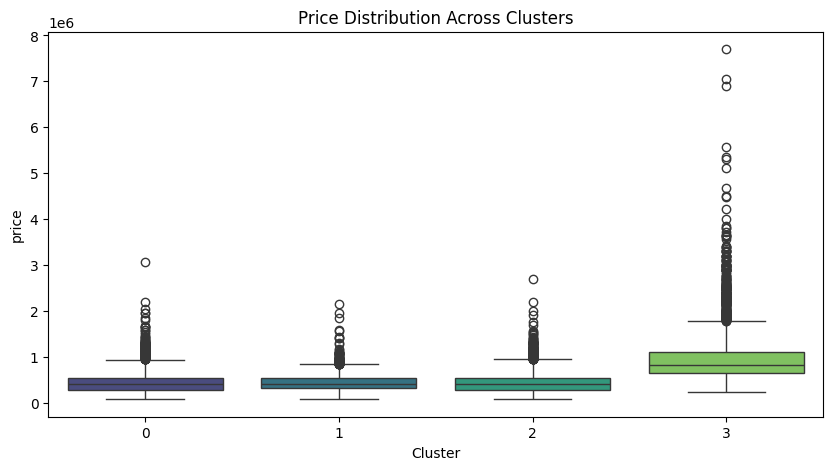

In [95]:
# Boxplot of Price by Cluster
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Cluster'], y=df['price'], palette="viridis")
plt.title("Price Distribution Across Clusters")
plt.show()

####**Cluster 0: Older, Mid-Range Homes**


      Price: 437K (mean), $399K (median) → Mid-priced homes
      Rooms: 3.2 bedrooms, 1.7 bathrooms
      Living Area: 1,693 sq. ft., Lot Size: 13,960 sq. ft.
      Ceiling Height: 1.13 floors
      Condition & Quality: Moderate condition (3.5), decent quality (7.0)
      Basement: Small (~334 sq. ft.)
      Age: Older homes (69 years old)
      Renovation: Moderate, around 1.4 years since last renovation
      Coastal View: Very rare (0.7%)

        

Insights

      These homes are older but affordable, with moderate condition and average quality.
      Homes have moderate living space but large lot sizes, indicating suburban or semi-rural areas.
      Low renovation frequency, meaning these homes may need updates.

####**Cluster 1: Modern, Compact, and Slightly Expensive Homes**

      Price: $439K (mean), $414K (median)
      Rooms: 3.35 bedrooms, 2.5 bathrooms
      Living Area: 2,025 sq. ft., Lot Size: 10,780 sq. ft.
      Ceiling Height: 2 floors
      Condition & Quality: Lower condition (3.1), slightly better quality (7.6)
      Basement: Smallest basement area (~86 sq. ft.)
      Age: Newer homes (25 years old)
      Renovation: Rarely renovated (0.18 years since last renovation)
      Coastal View: Rare (0.1%)

Insights

      These homes are newer, slightly more expensive, and have a modern design with 2 floors.
      Smaller lot sizes but more efficient living space compared to Cluster 0.
      Lower maintenance required due to newer construction and fewer renovations.
      More bathrooms, making them family-friendly.

####**Cluster 2: Older, Affordable Homes (Similar to Cluster 0 but More Deteriorated)**

      Price: $435K (mean), $399.9K (median)
      Rooms: 3.2 bedrooms, 1.72 bathrooms
      Living Area: 1,704 sq. ft., Lot Size: 12,987 sq. ft.
      Ceiling Height: 1.13 floors
      Condition & Quality: Slightly worse than Cluster 0 (Condition = 3.6, Quality = 7.0)
      Basement: Similar size (~351 sq. ft.)
      Age: Oldest homes (72 years old)
      Renovation: Rarely renovated (1.85 years since last renovation)
      Coastal View: Very rare (0.5%)

Insights

      Very similar to Cluster 0, but older homes with slightly worse condition.
      Still affordable, with decent lot sizes, but may require more maintenance.
      Very few renovations, making them less modern than Cluster 0.
      Likely to be found in rural or suburban settings.

####**Cluster 3: Luxury & Premium Homes**

      Price: $961K (mean), $810K (median) → High-end properties
      Rooms: 3.85 bedrooms, 2.86 bathrooms
      Living Area: 3,255 sq. ft., Lot Size: 25,024 sq. ft.
      Ceiling Height: 1.87 floors
      Condition & Quality: Best quality (9.5), moderate condition (3.25)
      Basement: Largest (~374 sq. ft.)
      Age: Moderately old (35 years)
      Renovation: More frequent renovations (1.16 years)
      Coastal View: Highest (2%)

Insights


      Most expensive and largest homes, ideal for luxury buyers.
      High-end quality (9.5), but moderate condition (3.2) suggests older luxury homes that may need maintenance.
      Larger basement space, more coastal views, and biggest total area.
      Most frequently renovated, indicating these homes are well-maintained.

#**Hierarchical Clustering**

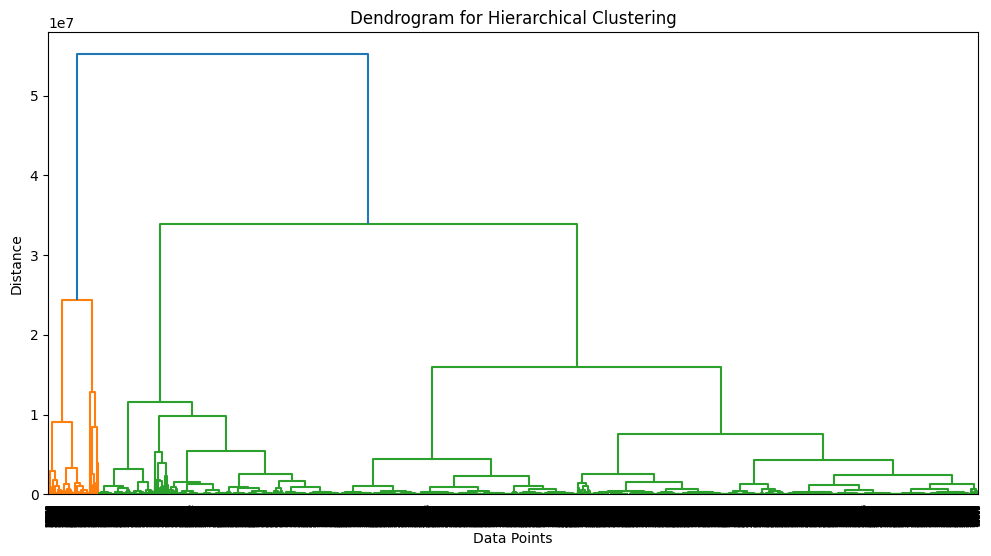

In [96]:


# Dendrogram for choosing clusters
plt.figure(figsize=(12, 6))
sch.dendrogram(sch.linkage(df[num_cols], method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Fit Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
df['Cluster_Hierarchical'] = agg_clustering.fit_predict(cluster_df)

####Insights

1. Number of Clusters

* The large vertical blue line at the top suggests that the data naturally splits into two primary clusters at a high level.
* As you move down, the tree branches into smaller subclusters, indicating more fine-grained groupings.
2. Cluster Separation

* The height of the merges (vertical lines) represents the distance between clusters.
* The biggest vertical jumps (especially in blue and green) show where significant differences exist between clusters.
* The orange section on the left suggests closely related data points with smaller distances, meaning those points are more similar to each other.
3. Best Cut-Off for Clusters

* If you want a higher-level segmentation, cutting around the large blue split (at ~50 million distance) would give 2 clusters.
* If you need more detailed clustering, cutting at a lower level (around 10-15 million) could result in 4-6 clusters.
4. Cluster Density

* The left side of the dendrogram has many short branches, indicating dense, highly similar data points.
* The right side has longer branches, meaning the data points are more dispersed and dissimilar.

In [97]:
h_cluster_summary = df.groupby('Cluster_Hierarchical').mean()
print(h_cluster_summary)

                          price  room_bed  room_bath  living_measure  \
Cluster_Hierarchical                                                   
0                    961228.179     3.841      2.854        3237.010   
1                    438699.904     3.226      1.770        1741.646   
2                    434515.456     3.365      2.457        2017.633   
3                    424458.852     3.164      1.658        1622.945   

                      lot_measure  ceil  coast  sight  condition  quality  \
Cluster_Hierarchical                                                        
0                       25097.195 1.866  0.037  0.633      3.254    9.491   
1                       14107.667 1.168  0.000  0.257      3.610    7.076   
2                       10404.369 2.098  0.000  0.002      3.080    7.621   
3                       11643.026 1.102  0.000  0.002      3.514    6.967   

                      ceil_measure  basement  living_measure15  lot_measure15  \
Cluster_Hierarchical   

In [98]:
cluster_median = df.groupby("Cluster_Hierarchical").median()
print(cluster_median)

                          price  room_bed  room_bath  living_measure  \
Cluster_Hierarchical                                                   
0                    810000.000     4.000      2.500        3100.000   
1                    400000.000     3.000      1.750        1670.000   
2                    410000.000     3.000      2.500        1960.000   
3                    390000.000     3.000      1.750        1540.000   

                      lot_measure  ceil  coast  sight  condition  quality  \
Cluster_Hierarchical                                                        
0                        9892.000 2.000  0.000  0.000      3.000    9.000   
1                        7851.000 1.000  0.000  0.000      3.000    7.000   
2                        5083.500 2.000  0.000  0.000      3.000    8.000   
3                        7725.000 1.000  0.000  0.000      3.000    7.000   

                      ceil_measure  basement  living_measure15  lot_measure15  \
Cluster_Hierarchical   

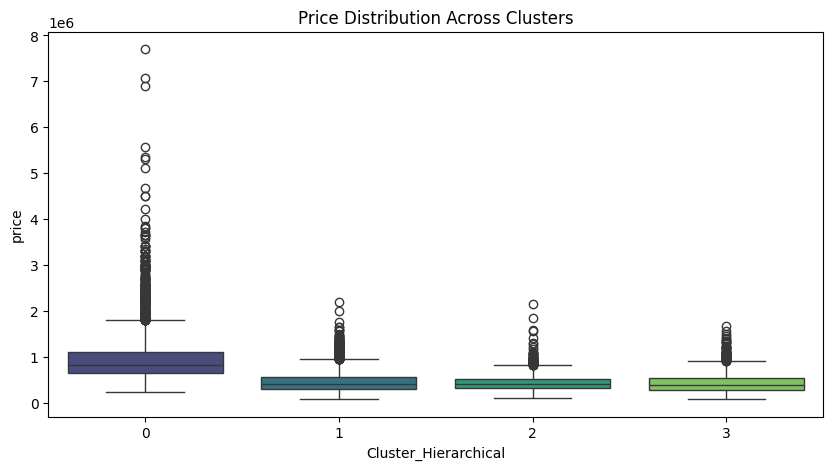

In [99]:
# Boxplot of Price by Cluster
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Cluster_Hierarchical'], y=df['price'], palette="viridis")
plt.title("Price Distribution Across Clusters")
plt.show()

####**Cluster 0: Luxury Estates**


      Price: $961K (mean), $810K (median) → Most expensive homes
      Rooms: 3.8 bedrooms, 2.9 bathrooms
      Living Area: 3,237 sq. ft., Lot Size: 25,097 sq. ft.
      Ceiling Height: 1.87 floors
      Condition & Quality: Moderate condition (3.25), Best quality (9.5)
      Basement: 375 sq. ft.
      Age: 36 years old
      Renovation: Recently renovated (1.36 years ago)
      Furnishing: Mostly furnished (98%)
      Coastal View: Rare (~3.7%)

        

Insights

      These homes are high-end properties with large living spaces and premium quality.
      Mostly furnished, suggesting move-in-ready luxury homes.
      Relatively newer than other clusters, making them well-maintained properties.

####**Cluster 1: Standard Family Homes**

      Price: $439K (mean), $400K (median) → Mid-priced family homes
      Rooms: 3.2 bedrooms, 1.8 bathrooms
      Living Area: 1,742 sq. ft., Lot Size: 14,108 sq. ft.
      Ceiling Height: 1.17 floors
      Condition & Quality: Best condition (3.61), Good quality (7.1)
      Basement: 353 sq. ft.
      Age: Oldest homes (70 years old)
      Renovation: Moderate (~2 years ago)
      Furnishing: Not furnished (0%)
      Coastal View: Very rare (0%)

Insights

      These homes are older but well-maintained with mid-range prices.
      Moderate living area and large lots, making them suitable for families.
      Not furnished, which suggests more customization opportunities for buyers.

####**Cluster 2: Mid-Sized Homes with Modern Touch**

      Price: $435K (mean), $410K (median) → Mid-range homes
      Rooms: 3.4 bedrooms, 2.5 bathrooms
      Living Area: 2,018 sq. ft., Lot Size: 10,404 sq. ft.
      Ceiling Height: Tallest (2.1 floors)
      Condition & Quality: Moderate condition (3.08), Good quality (7.6)
      Basement: 73 sq. ft. (smallest)
      Age: Youngest homes (26 years old)
      Renovation: Rarely renovated (0.1 years ago)
      Furnishing: Not furnished (0%)
      Coastal View: Extremely rare (0.2%)

Insights

      More modern homes with spacious interiors, appealing to buyers looking for newer houses.
      Highest ceiling heights, which may indicate open layouts and contemporary designs.
      Not frequently renovated, meaning they likely have original features intact.

####**Cluster 3: Budget-Friendly Smaller Homes**

      Price: $424K (mean), $390K (median) → Most affordable homes
      Rooms: 3.2 bedrooms, 1.7 bathrooms
      Living Area: 1,623 sq. ft., Lot Size: 11,643 sq. ft.
      Ceiling Height: 1.1 floors (lowest)
      Condition & Quality: Moderate condition (3.51), Decent quality (7.0)
      Basement: 314 sq. ft.
      Age: Older homes (70 years old)
      Renovation: Minimal (~0.6 years ago)
      Furnishing: Not furnished (0%)
      Coastal View: Very rare (0%)

Insights


      These are smaller, budget-friendly homes, ideal for first-time homebuyers.
      Lower ceiling heights may suggest compact or traditional-style houses.
      Minimal renovations, meaning they might require updates.

###**Cluster Comparison**

1. Cluster Alignment:

        KMeans and Hierarchical clustering yield similar clusters with Cluster 2,
        representing the most expensive properties
        with larger living areas,
        higher quality, and better sight ratings.
        Cluster 0 in both models represents the smallest, least expensive properties.
        Clusters 1 and 3 are mid-range properties
        with Cluster 3 typically having larger lots and higher ceilings.
2. Price Distribution:

        Cluster 2 (both models) has the highest price range ($961K).
        Cluster 0 has the lowest ($424K - $437K).
3. Lot & Living Space:

        Cluster 2 in both models has the largest living and lot measurements.
        Cluster 0 has the smallest.
4. Quality & Condition:

        Cluster 2 homes are of the highest quality (9.5 in KMeans, 9.4 in Hierarchical).
        Cluster 0 has the lowest (7.0 in KMeans, 6.9 in Hierarchical).
5. Coastal Influence & Sight:

        Cluster 2 has the highest sight scores, indicating better views.
        Coastal influence is almost negligible across clusters.

#**Recursive Feature Elimination**

In [100]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import RFE

# # Define features and target variable
# X = df.drop(columns=["price", "Cluster", "Cluster_Hierarchical"])
# y = df["price"]

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Define the model
# model = LinearRegression()

# # Use RFE to select the top 10 features
# rfe = RFE(model, n_features_to_select=6)
# rfe.fit(X_scaled, y)

# # Get selected features
# selected_features = X.columns[rfe.support_]

# print("Top Selected Features:")
# print(selected_features)

In [101]:
X = df.drop(columns=["price", "Cluster","Cluster_Hierarchical"])
y = df["price"]

In [102]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [103]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [104]:

# Use RFE to select the top 6 features
rfe = RFE(model, n_features_to_select=6)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]

print("Top Selected Features:")
print(selected_features)

Top Selected Features:
Index(['living_measure', 'quality', 'living_measure15', 'lot_measure15',
       'furnished', 'house_age'],
      dtype='object')


In [105]:
df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'days_since_sold', 'house_age', 'renovated_since',
       'Cluster', 'Cluster_Hierarchical'],
      dtype='object')

In [106]:
selected_features

Index(['living_measure', 'quality', 'living_measure15', 'lot_measure15',
       'furnished', 'house_age'],
      dtype='object')

#**Model Building and Tuning**

In [107]:
# X = df[['room_bed', 'room_bath', 'living_measure', 'lot_measure',
#        'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
#        'basement', 'living_measure15', 'lot_measure15', 'furnished',
#        'total_area', 'days_since_sold', 'house_age', 'renovated_since']]
X=df[selected_features]
y = df['price']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [109]:
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [110]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {model_name}')
    plt.show()

##Parametric Models

### **OLS**

###Various iterations of MLR

In [113]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [123]:
def perform_mlr_iterations(X_train, y_train, X_test, y_test):
    selected_features = X_train.columns.tolist()
    prev_rmse = float('inf')
    iterations = 0

    while iterations < 10:  # Limiting to 10 iterations or use a stopping condition
        print(f"Iteration {iterations + 1}:")

        # Add constant (intercept) to the model
        X_train_ols = sm.add_constant(X_train[selected_features])
        X_test_ols = sm.add_constant(X_test[selected_features])

        # Fit the model
        ols_model = sm.OLS(y_train, X_train_ols).fit()

        # Summary to check p-values and coefficients
        print(ols_model.summary())

        # Check VIF for each feature
        vif_data = calculate_vif(X_train_ols.drop('const', axis=1))  # Drop constant for VIF calculation
        print("VIF values:")
        print(vif_data)

        # Drop feature if VIF > threshold (e.g., VIF > 10 or other criteria)
        high_vif = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
        if high_vif:
            print(f"Dropping features with high VIF: {high_vif}")
            selected_features = [f for f in selected_features if f not in high_vif]

        # Drop feature if p-value > significance level (e.g., 0.05)
        high_p_value_features = ols_model.pvalues[ols_model.pvalues > 0.05].index.tolist()
        if 'const' in high_p_value_features:
            high_p_value_features.remove('const')
        if high_p_value_features:
            print(f"Dropping features with high p-values: {high_p_value_features}")
            selected_features = [f for f in selected_features if f not in high_p_value_features]

        # Predict on training and test data
        y_train_pred_ols = ols_model.predict(X_train_ols)
        y_test_pred_ols = ols_model.predict(X_test_ols)

        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_ols))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ols))
        train_mape = mean_absolute_percentage_error(y_train, y_train_pred_ols)
        test_mape = mean_absolute_percentage_error(y_test, y_test_pred_ols)
        train_r2 = r2_score(y_train, y_train_pred_ols)
        test_r2 = r2_score(y_test, y_test_pred_ols)
        train_adj_r2 = adjusted_r2(train_r2, X_train.shape[0], len(selected_features))
        test_adj_r2 = adjusted_r2(test_r2, X_test.shape[0], len(selected_features))

        print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
        print(f"Train MAPE: {train_mape}, Test MAPE: {test_mape}")
        print(f"Train R2: {train_r2}, Test R2: {test_r2}")
        print(f"Train Adj R2: {train_adj_r2}, Test Adj R2: {test_adj_r2}")

        # If there's no improvement in RMSE, stop
        if abs(prev_rmse - test_rmse) < 0.001:
            print("No significant improvement in RMSE. Stopping iterations.")
            break

        prev_rmse = test_rmse
        iterations += 1

    return ols_model

In [124]:
ols_model = perform_mlr_iterations(X_train, y_train, X_test, y_test)

Iteration 1:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4367.
Date:                Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:56:13   Log-Likelihood:            -2.3496e+05
No. Observations:               17050   AIC:                         4.699e+05
Df Residuals:                   17043   BIC:                         4.700e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.079e+06

In [128]:
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)
ols_model = sm.OLS(y_train, X_train_ols).fit()
y_train_pred_ols = ols_model.predict(X_train_ols)
y_test_pred_ols = ols_model.predict(X_test_ols)
print("OLS Summary:")
print(ols_model.summary())


OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4367.
Date:                Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:57:49   Log-Likelihood:            -2.3496e+05
No. Observations:               17050   AIC:                         4.699e+05
Df Residuals:                   17043   BIC:                         4.700e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.079e+06

In [129]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_ols))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ols))
train_mape = mean_absolute_percentage_error(y_train, y_train_pred_ols)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred_ols)
train_r2 = r2_score(y_train, y_train_pred_ols)
test_r2 = r2_score(y_test, y_test_pred_ols)
train_adj_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adj_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

OLS Train RMSE: 233678.19527592586
OLS Test RMSE: 222015.51088363677
OLS Train MAPE: 31.087990387168734
OLS Test MAPE: 31.27622005041088
OLS Train R2: 0.6058878050278889
OLS Test R2: 0.6008698371150594
OLS Train Adj R2: 0.6057490575556227
OLS Test Adj R2: 0.6003071536147517


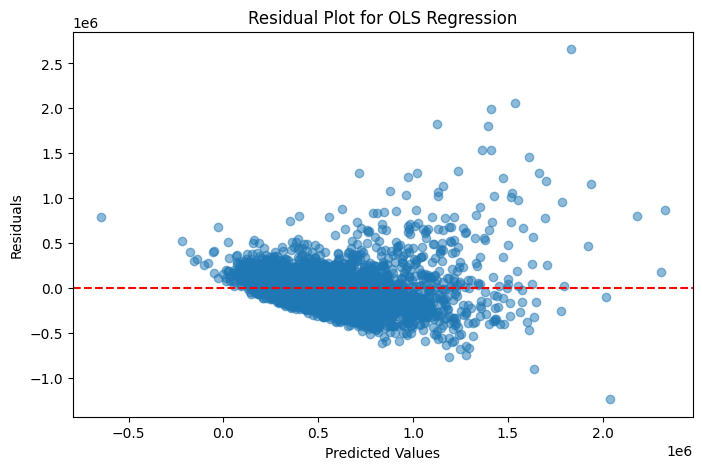

In [130]:
print("OLS Train RMSE:",train_rmse)
print("OLS Test RMSE:", test_rmse)
print("OLS Train MAPE:", train_mape)
print("OLS Test MAPE:", test_mape)
print("OLS Train R2:", train_r2)
print("OLS Test R2:", test_r2)
print("OLS Train Adj R2:", train_adj_r2)
print("OLS Test Adj R2:", test_adj_r2)
plot_residuals(y_test, y_test_pred_ols, "OLS Regression")

In [131]:
metrics_df = pd.DataFrame()
metrics_df['Model'] = ['OLS']
metrics_df['Train RMSE'] = [train_rmse]
metrics_df['Test RMSE'] = [test_rmse]
metrics_df['Train MAPE'] = [train_mape]
metrics_df['Test MAPE'] = [test_mape]
metrics_df['Train R2'] = [train_r2]
metrics_df['Test R2'] = [test_r2]
metrics_df['Train Adj R2'] = [train_adj_r2]
metrics_df['Test Adj R2'] = [test_adj_r2]
metrics_df['Residual Plot Observations'] = ["Shows heteroscedasticity, with residual variance increasing at higher values. Presence of outliers."]

In [132]:
metrics_df

,Model,Train RMSE,Test RMSE,Train MAPE,Test MAPE,Train R2,Test R2,Train Adj R2,Test Adj R2,Residual Plot Observations
0,OLS,233678.195,222015.511,31.088,31.276,0.606,0.601,0.606,0.600,"Shows heteroscedasticity, with residual varian..."


###**LASSO**

In [ ]:


param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Lasso Regression
lasso_cv = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)
best_lasso = lasso_cv.best_estimator_
print("Best Lasso Alpha:", lasso_cv.best_params_)

In [133]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)


In [134]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
train_mape = mean_absolute_percentage_error(y_train, y_train_pred_lasso)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred_lasso)
train_r2 = r2_score(y_train, y_train_pred_lasso)
test_r2 = r2_score(y_test, y_test_pred_lasso)
train_adj_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adj_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

Lasso Train RMSE: 233678.197846037
Lasso Test RMSE: 222015.56882892945
Lasso Train MAPE: 31.088625070810888
Lasso Test MAPE: 31.276601890633742
Lasso Train R2: 0.6058877963585978
Lasso Test R2: 0.600869628771804
Lasso Train Adj R2: 0.6057490488832795
Lasso Test Adj R2: 0.6003069449777794


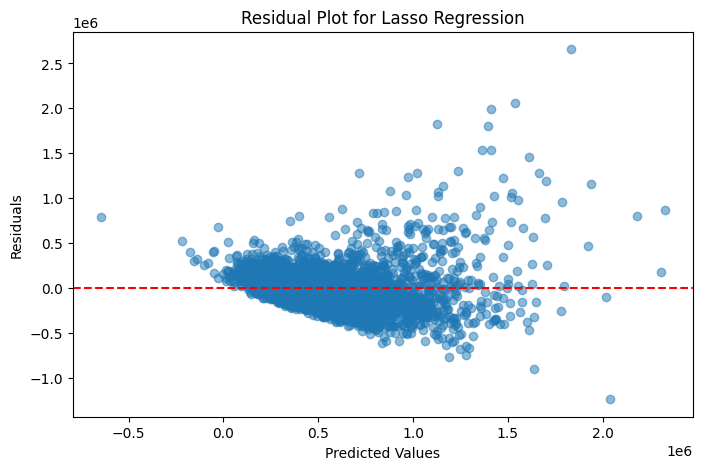

In [135]:
print("Lasso Train RMSE:",train_rmse)
print("Lasso Test RMSE:", test_rmse)
print("Lasso Train MAPE:", train_mape)
print("Lasso Test MAPE:", test_mape)
print("Lasso Train R2:", train_r2)
print("Lasso Test R2:", test_r2)
print("Lasso Train Adj R2:", train_adj_r2)
print("Lasso Test Adj R2:", test_adj_r2)
plot_residuals(y_test, y_test_pred_lasso, "Lasso Regression")

In [136]:
new_row = pd.DataFrame([{
    'Model': 'Lasso',
    'Train RMSE': train_rmse,
    'Test RMSE': test_rmse,
    'Train MAPE': train_mape,
    'Test MAPE': test_mape,
    'Train R2': train_r2,
    'Test R2': test_r2,
    'Train Adj R2': train_adj_r2,
    'Test Adj R2': test_adj_r2,
    'Residual Plot Observations': "Similar to OLS, with slight regularization. Residual spread remains similar."
}])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

In [137]:
metrics_df

,Model,Train RMSE,Test RMSE,Train MAPE,Test MAPE,Train R2,Test R2,Train Adj R2,Test Adj R2,Residual Plot Observations
0,OLS,233678.195,222015.511,31.088,31.276,0.606,0.601,0.606,0.600,"Shows heteroscedasticity, with residual varian..."
1,Lasso,233678.198,222015.569,31.089,31.277,0.606,0.601,0.606,0.600,"Similar to OLS, with slight regularization. Re..."


###**Ridge**

In [ ]:
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_
print("Best Ridge Alpha:", ridge_cv.best_params_)

In [138]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)


In [139]:
coefs = ridge.coef_


coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefs})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])  # Take absolute value for ranking


coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)


print(coef_df.head(20))


            Feature  Coefficient  Abs_Coefficient
1           quality   131988.602       131988.602
4         furnished    25825.521        25825.521
5         house_age     3697.558         3697.558
0    living_measure      178.111          178.111
2  living_measure15       20.082           20.082
3     lot_measure15       -0.524            0.524


In [140]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
train_mape = mean_absolute_percentage_error(y_train, y_train_pred_ridge)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred_ridge)
train_r2 = r2_score(y_train, y_train_pred_ridge)
test_r2 = r2_score(y_test, y_test_pred_ridge)
train_adj_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adj_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

Ridge Train RMSE: 233678.19555652916
Ridge Test RMSE: 222015.3984816356
Ridge Train MAPE: 31.087827362829824
Ridge Test MAPE: 31.276072586987862
Ridge Train R2: 0.6058878040813804
Ridge Test R2: 0.6008702412581528
Ridge Train Adj R2: 0.6057490566087811
Ridge Test Adj R2: 0.6003075583275956


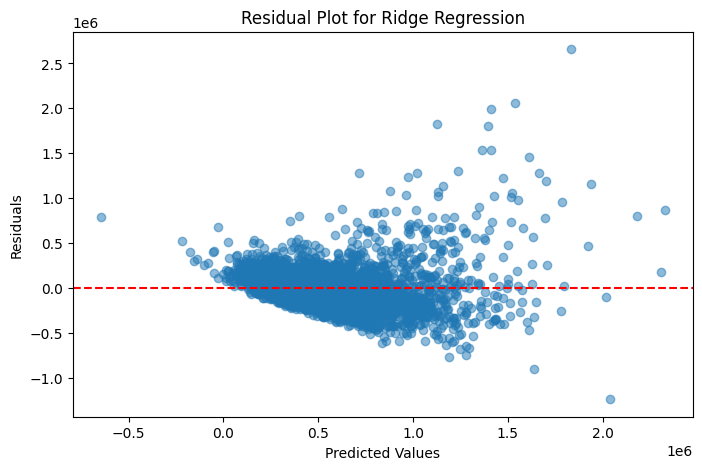

In [141]:
print("Ridge Train RMSE:", train_rmse)
print("Ridge Test RMSE:", test_rmse)
print("Ridge Train MAPE:", train_mape)
print("Ridge Test MAPE:", test_mape)
print("Ridge Train R2:", train_r2)
print("Ridge Test R2:", test_r2)
print("Ridge Train Adj R2:", train_adj_r2)
print("Ridge Test Adj R2:", test_adj_r2)
plot_residuals(y_test, y_test_pred_ridge, "Ridge Regression")

In [142]:
new_row = pd.DataFrame([{
    'Model': 'Ridge',
    'Train RMSE': train_rmse,
    'Test RMSE': test_rmse,
    'Train MAPE': train_mape,
    'Test MAPE': test_mape,
    'Train R2': train_r2,
    'Test R2': test_r2,
    'Train Adj R2': train_adj_r2,
    'Test Adj R2': test_adj_r2,
    'Residual Plot Observations': "Similar pattern to OLS and Lasso; regularization doesn't significantly affect residual distribution."
}])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

###**Polynomial Regression**

In [ ]:
param_grid = {'degree': [1, 2, 3, 4, 5]}

best_score = float('-inf')
best_degree = 1

for d in param_grid['degree']:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    score = poly_model.score(X_test_poly, y_test)
    if score > best_score:
        best_score = score
        best_degree = d

print("Best Polynomial Degree:", best_degree)

In [143]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

In [144]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))
train_mape = mean_absolute_percentage_error(y_train, y_train_pred_poly)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred_poly)
train_r2 = r2_score(y_train, y_train_pred_poly)
test_r2 = r2_score(y_test, y_test_pred_poly)
train_adj_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adj_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

Polynomial Train RMSE: 203696.0782891096
Polynomial Test RMSE: 203956.90900489592
Polynomial Train MAPE: 27.11245025531726
Polynomial Test MAPE: 27.785047769298703
Polynomial Train R2: 0.7005330985040448
Polynomial Test R2: 0.6631591470956926
Polynomial Train Adj R2: 0.7004276709731537
Polynomial Test Adj R2: 0.6626842774722372


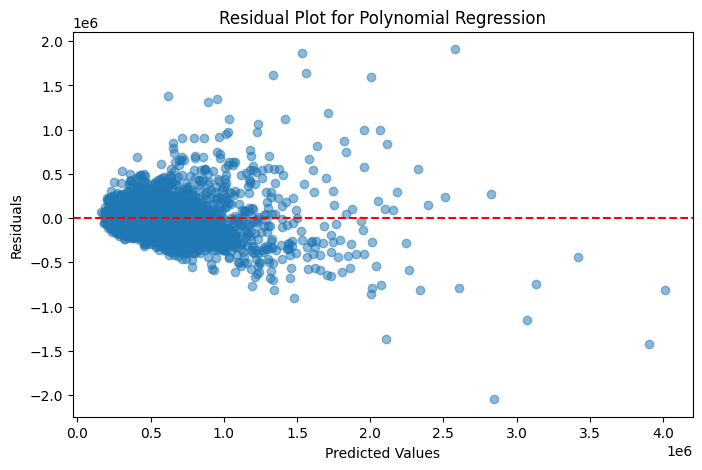

In [145]:

print("Polynomial Train RMSE:", train_rmse)
print("Polynomial Test RMSE:", test_rmse)
print("Polynomial Train MAPE:", train_mape)
print("Polynomial Test MAPE:", test_mape)
print("Polynomial Train R2:", train_r2)
print("Polynomial Test R2:", test_r2)
print("Polynomial Train Adj R2:", train_adj_r2)
print("Polynomial Test Adj R2:", test_adj_r2)
plot_residuals(y_test, y_test_pred_poly, "Polynomial Regression")

In [146]:
new_row = pd.DataFrame([{
    'Model': 'Polynomial',
    'Train RMSE': train_rmse,
    'Test RMSE': test_rmse,
    'Train MAPE': train_mape,
    'Test MAPE': test_mape,
    'Train R2': train_r2,
    'Test R2': test_r2,
    'Train Adj R2': train_adj_r2,
    'Test Adj R2': test_adj_r2,
    'Residual Plot Observations': "Clear curvature in residuals, indicating overfitting to some patterns. Higher spread at extreme values."
}])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

In [147]:
metrics_df

,Model,Train RMSE,Test RMSE,Train MAPE,Test MAPE,Train R2,Test R2,Train Adj R2,Test Adj R2,Residual Plot Observations
0,OLS,233678.195,222015.511,31.088,31.276,0.606,0.601,0.606,0.600,"Shows heteroscedasticity, with residual varian..."
1,Lasso,233678.198,222015.569,31.089,31.277,0.606,0.601,0.606,0.600,"Similar to OLS, with slight regularization. Re..."
2,Ridge,233678.196,222015.398,31.088,31.276,0.606,0.601,0.606,0.600,Similar pattern to OLS and Lasso; regularizati...
3,Polynomial,203696.078,203956.909,27.112,27.785,0.701,0.663,0.700,0.663,"Clear curvature in residuals, indicating overf..."


##Non-Parametric Models

###**Random Forest Regressor**

In [ ]:
rf_params = {
    "n_estimators": randint(100, 500),
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2"]
}

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf_search = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)
print("Best RF Params:", rf_search.best_params_)

In [ ]:
rf_search.best_params_

In [ ]:
X_train.columns

Index(['living_measure', 'quality', 'living_measure15', 'lot_measure15',
       'furnished', 'house_age'],
      dtype='object')

Random Forest Train RMSE: 176082.06976945815
Random Forest Test RMSE: 188996.7196053877
Random Forest Train MAPE: 18.981092549040188
Random Forest Test MAPE: 23.33004181762581
Random Forest Train R2: 0.7762238680195349
Random Forest Test R2: 0.7107612688215719
Random Forest Train Adj R2: 0.7761450874766797
Random Forest Test Adj R2: 0.7103535074524294


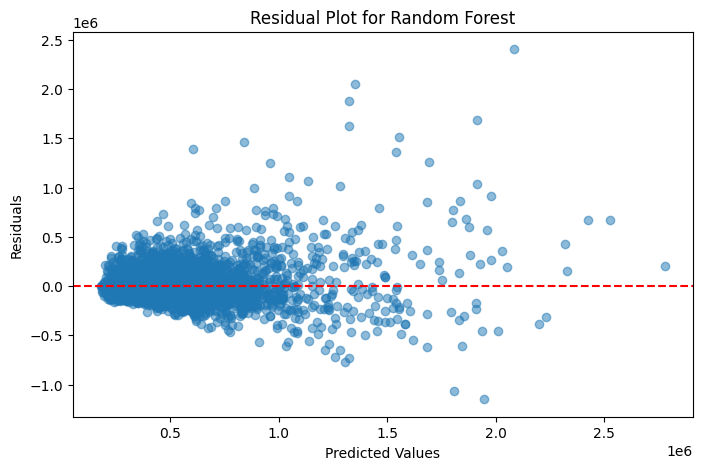

In [111]:
# Random Forest Regressor
rf = RandomForestRegressor(max_depth=20,max_features='log2',min_samples_leaf=5, min_samples_split=20,n_estimators=500, random_state=42, bootstrap=True)


y_train_log = np.log1p(y_train)  # log(1 + y) to handle zeros
y_test_log = np.log1p(y_test)

rf.fit(X_train, y_train_log)

# Make predictions in the log scale
y_train_pred_log = rf.predict(X_train)
y_test_pred_log = rf.predict(X_test)

# Convert predictions back to original scale
y_train_pred_rf = np.expm1(y_train_pred_log)  # exp(y) - 1
y_test_pred_rf = np.expm1(y_test_pred_log)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
train_mape = mean_absolute_percentage_error(y_train, y_train_pred_rf)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred_rf)
train_r2 = r2_score(y_train, y_train_pred_rf)
test_r2 = r2_score(y_test, y_test_pred_rf)
train_adj_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adj_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

print("Random Forest Train RMSE:", train_rmse)
print("Random Forest Test RMSE:", test_rmse)
print("Random Forest Train MAPE:", train_mape)
print("Random Forest Test MAPE:", test_mape)
print("Random Forest Train R2:", train_r2)
print("Random Forest Test R2:", test_r2)
print("Random Forest Train Adj R2:", train_adj_r2)
print("Random Forest Test Adj R2:", test_adj_r2)
plot_residuals(y_test, y_test_pred_rf, "Random Forest")

In [ ]:
new_row = pd.DataFrame([{
    'Model': 'Random Forest',
    'Train RMSE': train_rmse,
    'Test RMSE': test_rmse,
    'Train MAPE': train_mape,
    'Test MAPE': test_mape,
    'Train R2': train_r2,
    'Test R2': test_r2,
    'Train Adj R2': train_adj_r2,
    'Test Adj R2': test_adj_r2,
    'Residual Plot Observations': "No strong pattern, but some extreme residuals indicate potential overfitting."
}])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

In [ ]:
metrics_df

,Model,Train RMSE,Test RMSE,Train MAPE,Test MAPE,Train R2,Test R2,Train Adj R2,Test Adj R2,Residual Plot Observations
0,OLS,233678.195,222015.511,31.088,31.276,0.606,0.601,0.606,0.600,"Shows heteroscedasticity, with residual varian..."
1,Lasso,233678.198,222015.569,31.089,31.277,0.606,0.601,0.606,0.600,"Similar to OLS, with slight regularization. Re..."
2,Ridge,233678.196,222015.398,31.088,31.276,0.606,0.601,0.606,0.600,Similar pattern to OLS and Lasso; regularizati...
3,Polynomial,203696.078,203956.909,27.112,27.785,0.701,0.663,0.700,0.663,"Clear curvature in residuals, indicating overf..."
4,Random Forest,176082.070,188996.720,18.981,23.330,0.776,0.711,0.776,0.710,"No strong pattern, but some extreme residuals ..."


###**Adaboost Regression**

In [149]:
ab_params = {
    "n_estimators": randint(50, 500),
    "learning_rate": uniform(0.01, 1.0),
    "loss": ["linear", "square", "exponential"],
    "estimator": [DecisionTreeRegressor(max_depth=1), DecisionTreeRegressor(max_depth=3)]
}

In [ ]:
ab = AdaBoostRegressor(random_state=42)
ab_search = RandomizedSearchCV(ab, ab_params, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
ab_search.fit(X_train, y_train)
print("Best AB Params:", ab_search.best_params_)

AdaBoost Train RMSE: 250518.92848861875
AdaBoost Test RMSE: 255177.66930953242
AdaBoost Train MAPE: 44.231161933172935
AdaBoost Test MAPE: 44.14051167906418
AdaBoost Train R2: 0.5470350639663468
AdaBoost Test R2: 0.4727297740803377
AdaBoost Train Adj R2: 0.5468755973456696
AdaBoost Test Adj R2: 0.4719864419949247


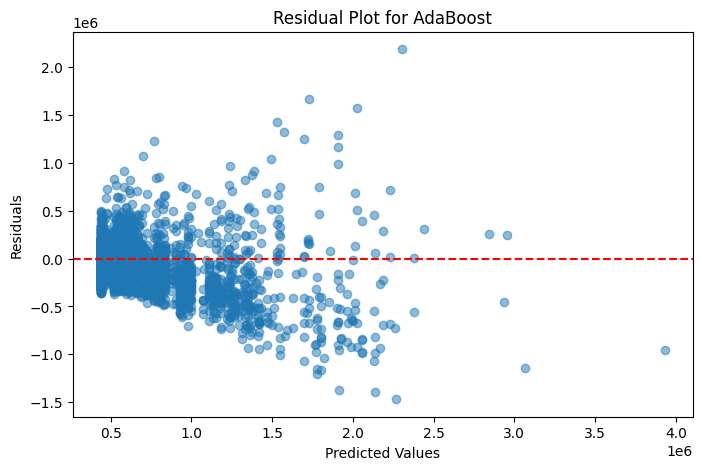

In [150]:
# AdaBoost Regressor
adaboost = AdaBoostRegressor(n_estimators=210,estimator=DecisionTreeRegressor(max_depth=3),learning_rate=0.19182496720710063,loss='linear',random_state=42)
adaboost.fit(X_train, y_train)
y_train_pred_ab = adaboost.predict(X_train)
y_test_pred_ab = adaboost.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_ab))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ab))
train_mape = mean_absolute_percentage_error(y_train, y_train_pred_ab)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred_ab)
train_r2 = r2_score(y_train, y_train_pred_ab)
test_r2 = r2_score(y_test, y_test_pred_ab)
train_adj_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adj_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

print("AdaBoost Train RMSE:", train_rmse)
print("AdaBoost Test RMSE:", test_rmse)
print("AdaBoost Train MAPE:", train_mape)
print("AdaBoost Test MAPE:", test_mape)
print("AdaBoost Train R2:", train_r2)
print("AdaBoost Test R2:", test_r2)
print("AdaBoost Train Adj R2:", train_adj_r2)
print("AdaBoost Test Adj R2:", test_adj_r2)
plot_residuals(y_test, y_test_pred_ab, "AdaBoost")

In [151]:
new_row = pd.DataFrame([{
    'Model': 'Adaboost',
    'Train RMSE': train_rmse,
    'Test RMSE': test_rmse,
    'Train MAPE': train_mape,
    'Test MAPE': test_mape,
    'Train R2': train_r2,
    'Test R2': test_r2,
    'Train Adj R2': train_adj_r2,
    'Test Adj R2': test_adj_r2,
    'Residual Plot Observations': "Residuals are skewed, suggesting bias. Model struggles with variance and extreme values."
}])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

In [152]:
metrics_df

,Model,Train RMSE,Test RMSE,Train MAPE,Test MAPE,Train R2,Test R2,Train Adj R2,Test Adj R2,Residual Plot Observations
0,OLS,233678.195,222015.511,31.088,31.276,0.606,0.601,0.606,0.600,"Shows heteroscedasticity, with residual varian..."
1,Lasso,233678.198,222015.569,31.089,31.277,0.606,0.601,0.606,0.600,"Similar to OLS, with slight regularization. Re..."
2,Ridge,233678.196,222015.398,31.088,31.276,0.606,0.601,0.606,0.600,Similar pattern to OLS and Lasso; regularizati...
3,Polynomial,203696.078,203956.909,27.112,27.785,0.701,0.663,0.700,0.663,"Clear curvature in residuals, indicating overf..."
4,Adaboost,250518.928,255177.669,44.231,44.141,0.547,0.473,0.547,0.472,"Residuals are skewed, suggesting bias. Model s..."


###**XGBoost Regression**

In [153]:
xgb_params = {
    "n_estimators": randint(100, 500),
    "learning_rate": uniform(0.01, 0.3),
    "max_depth": randint(3, 10),
    "subsample": uniform(0.5, 0.5),  # Values between 0.5 and 1.0
    "colsample_bytree": uniform(0.5, 0.5),
    "reg_lambda": uniform(0, 10)
}

In [ ]:
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
xgb_search.fit(X_train, y_train)
print("Best XGBoost Params:", xgb_search.best_params_)

XGBoost Train RMSE: 182835.73497541447
XGBoost Test RMSE: 186148.23306171884
XGBoost Train MAPE: 21.72861587396317
XGBoost Test MAPE: 23.558488176088698
XGBoost Train R2: 0.7587286829948425
XGBoost Test R2: 0.7194141149520874
XGBoost Train Adj R2: 0.7586437432599349
XGBoost Test Adj R2: 0.7190185521442192


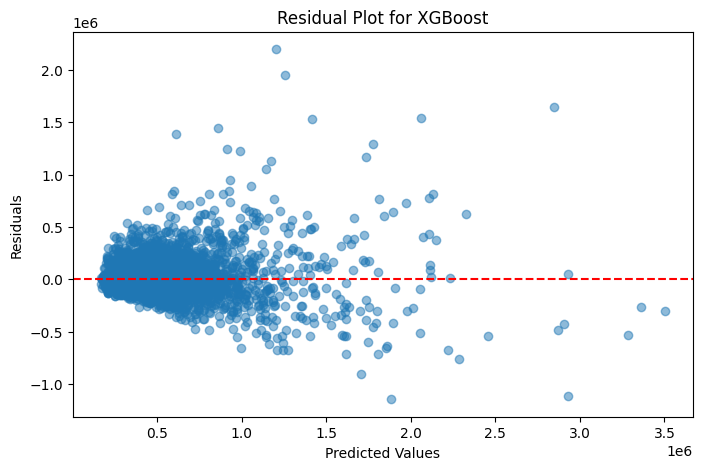

In [154]:
# XGBoost Regressor
xgb = XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.03,
    max_depth=5,
    n_estimators=500,
    reg_lambda=10,
    reg_alpha=2,
    subsample=0.8,
    random_state=42,
    min_child_weight=5
)
y_train_log = np.log1p(y_train)  # log(1 + y) to handle zeros
y_test_log = np.log1p(y_test)

xgb.fit(X_train, y_train_log)

# Make predictions in the log scale
y_train_pred_log = xgb.predict(X_train)
y_test_pred_log = xgb.predict(X_test)

# Convert predictions back to original scale
y_train_pred_xgb = np.expm1(y_train_pred_log)  # exp(y) - 1
y_test_pred_xgb = np.expm1(y_test_pred_log)
# xgb.fit(X_train, y_train)
# y_train_pred_xgb = xgb.predict(X_train)
# y_test_pred_xgb = xgb.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
train_mape = mean_absolute_percentage_error(y_train, y_train_pred_xgb)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred_xgb)
train_r2 = r2_score(y_train, y_train_pred_xgb)
test_r2 = r2_score(y_test, y_test_pred_xgb)
train_adj_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adj_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

print("XGBoost Train RMSE:", train_rmse)
print("XGBoost Test RMSE:", test_rmse)
print("XGBoost Train MAPE:", train_mape)
print("XGBoost Test MAPE:", test_mape)
print("XGBoost Train R2:", train_r2)
print("XGBoost Test R2:", test_r2)
print("XGBoost Train Adj R2:", train_adj_r2)
print("XGBoost Test Adj R2:", test_adj_r2)
plot_residuals(y_test, y_test_pred_xgb, "XGBoost")

In [155]:
new_row = pd.DataFrame([{
    'Model': 'XGBoost',
    'Train RMSE': train_rmse,
    'Test RMSE': test_rmse,
    'Train MAPE': train_mape,
    'Test MAPE': test_mape,
    'Train R2': train_r2,
    'Test R2': test_r2,
    'Train Adj R2': train_adj_r2,
    'Test Adj R2': test_adj_r2,
    'Residual Plot Observations': "Residual spread is controlled, but extreme values still appear. More robust than AdaBoost."
}])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

###**SVM Regressor**

In [ ]:
svr_params = {
    "C": uniform(0.1, 10),
    "epsilon": uniform(0.01, 1.0),
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto", 0.01, 0.1, 1]
}


In [ ]:
svr = SVR()
svr_search = RandomizedSearchCV(svr, svr_params, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
svr_search.fit(X_train, y_train)
print("Best SVR Params:", svr_search.best_params_)

In [156]:
# SVM Regressor
svm = SVR()
svm.fit(X_train, y_train)
y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_svm))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_svm))
train_mape = mean_absolute_percentage_error(y_train, y_train_pred_svm)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred_svm)
train_r2 = r2_score(y_train, y_train_pred_svm)
test_r2 = r2_score(y_test, y_test_pred_svm)
train_adj_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adj_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

SVM Train RMSE: 382752.5267195475
SVM Test RMSE: 363765.2170547808
SVM Train MAPE: 42.53032264734487
SVM Test MAPE: 42.460622361770675
SVM Train R2: -0.05735208584702933
SVM Test R2: -0.07149526169755238
SVM Train Adj R2: -0.057724327384028884
SVM Test Adj R2: -0.07300582832588542


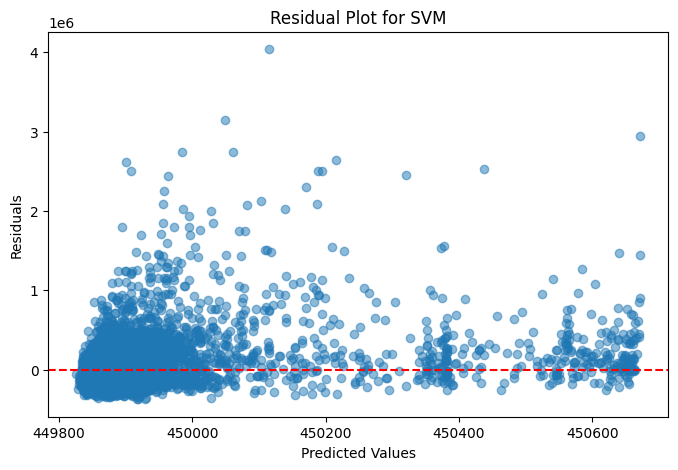

In [157]:
print("SVM Train RMSE:", train_rmse)
print("SVM Test RMSE:", test_rmse)
print("SVM Train MAPE:", train_mape)
print("SVM Test MAPE:", test_mape)
print("SVM Train R2:", train_r2)
print("SVM Test R2:", test_r2)
print("SVM Train Adj R2:", train_adj_r2)
print("SVM Test Adj R2:", test_adj_r2)
plot_residuals(y_test, y_test_pred_svm, "SVM")

In [158]:
new_row = pd.DataFrame([{
    'Model': 'SVM',
    'Train RMSE': train_rmse,
    'Test RMSE': test_rmse,
    'Train MAPE': train_mape,
    'Test MAPE': test_mape,
    'Train R2': train_r2,
    'Test R2': test_r2,
    'Train Adj R2': train_adj_r2,
    'Test Adj R2': test_adj_r2,
    'Residual Plot Observations': "Highly concentrated residuals, indicating underfitting. Systematic pattern suggests missing relationships."
}])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

In [159]:
metrics_df

,Model,Train RMSE,Test RMSE,Train MAPE,Test MAPE,Train R2,Test R2,Train Adj R2,Test Adj R2,Residual Plot Observations
0,OLS,233678.195,222015.511,31.088,31.276,0.606,0.601,0.606,0.600,"Shows heteroscedasticity, with residual varian..."
1,Lasso,233678.198,222015.569,31.089,31.277,0.606,0.601,0.606,0.600,"Similar to OLS, with slight regularization. Re..."
2,Ridge,233678.196,222015.398,31.088,31.276,0.606,0.601,0.606,0.600,Similar pattern to OLS and Lasso; regularizati...
3,Polynomial,203696.078,203956.909,27.112,27.785,0.701,0.663,0.700,0.663,"Clear curvature in residuals, indicating overf..."
4,Adaboost,250518.928,255177.669,44.231,44.141,0.547,0.473,0.547,0.472,"Residuals are skewed, suggesting bias. Model s..."
5,XGBoost,182835.735,186148.233,21.729,23.558,0.759,0.719,0.759,0.719,"Residual spread is controlled, but extreme val..."
6,SVM,382752.527,363765.217,42.530,42.461,-0.057,-0.071,-0.058,-0.073,"Highly concentrated residuals, indicating unde..."


In [ ]:
metrics_df.to_excel('/content/drive/MyDrive/PGPDSA/metrics.xlsx', index=False)

Final Observations:
* Random Forest is the best model, achieving the lowest RMSE on test data and a
relatively good residual distribution. However, it may slightly overfit.
* XGBoost is the second-best, providing competitive test RMSE and better generalization than Random Forest.
* Polynomial Regression overfits the data.
* SVM and AdaBoost perform poorly, with clear signs of underfitting or extreme variance.

In [ ]:
X_train.columns

Index(['living_measure', 'quality', 'living_measure15', 'lot_measure15',
       'furnished', 'house_age'],
      dtype='object')

#**Random Forest - Model Interpretation and Recommendations**

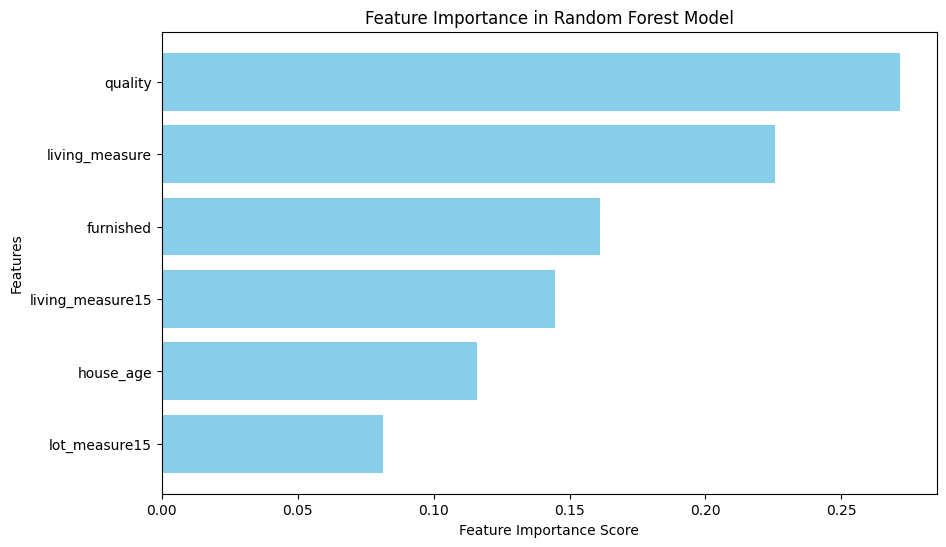

In [160]:
feature_importance = rf.feature_importances_
features = X.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

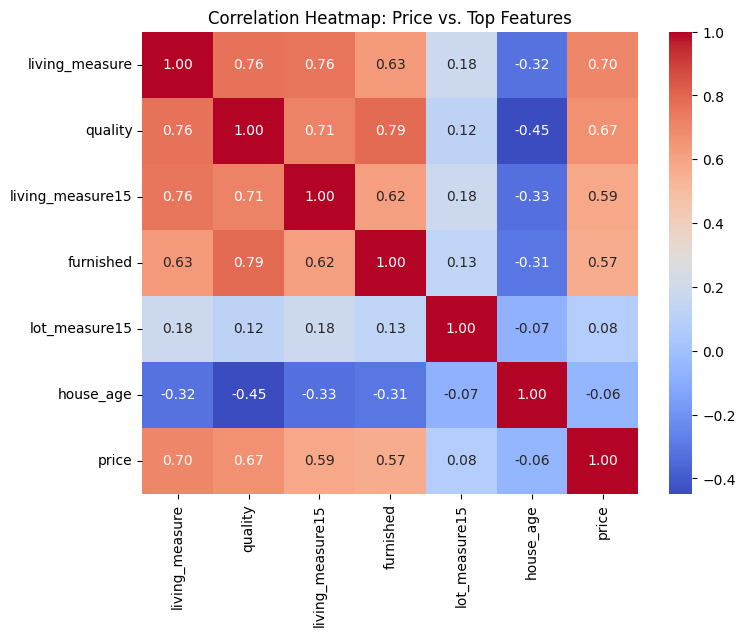

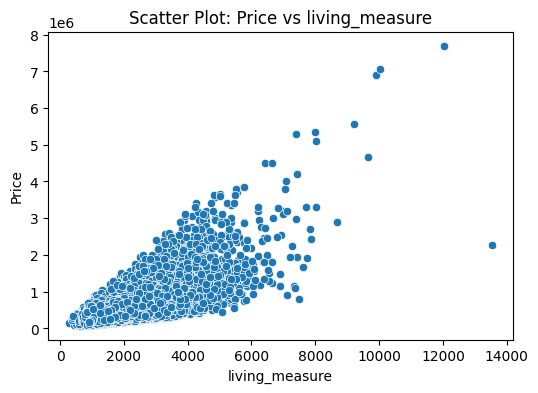

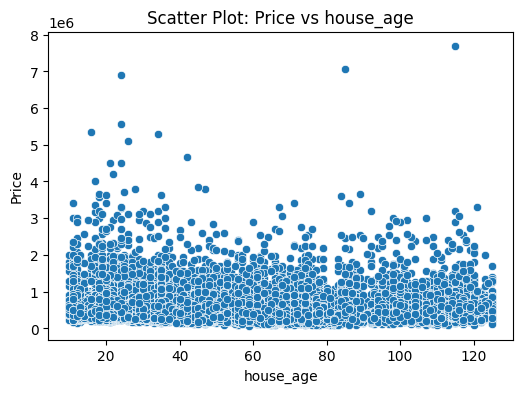

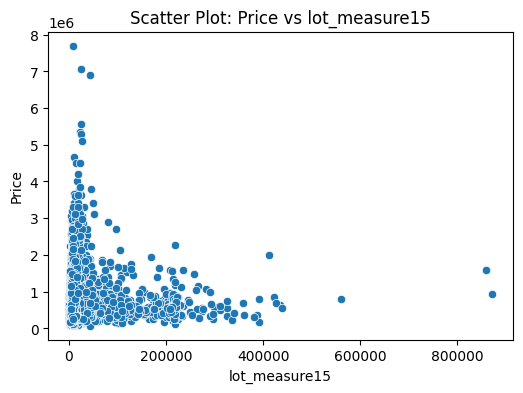

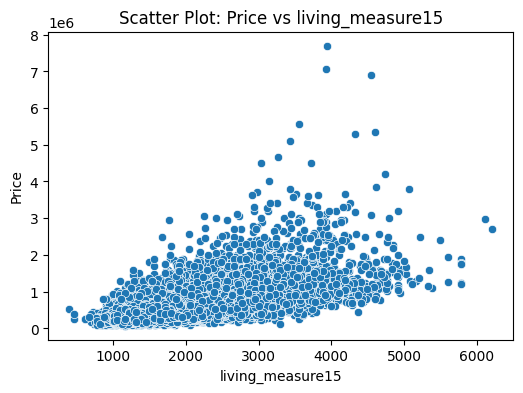

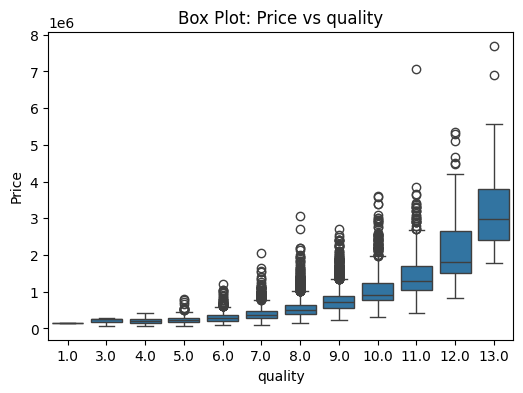

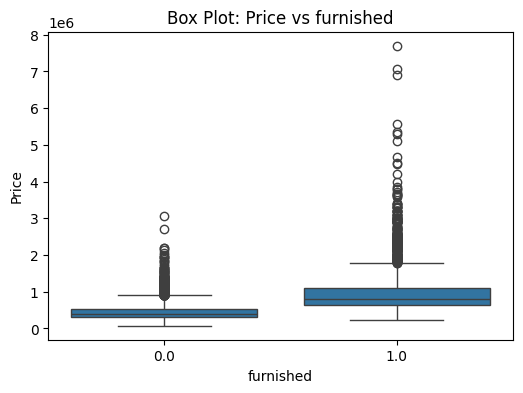

In [161]:
# Define top features from feature importance
top_features = ["living_measure", "quality", "living_measure15", "furnished", "lot_measure15", "house_age"]

# Pairwise Correlation Analysis
correlation = df[top_features + ["price"]].corr()

# Heatmap of Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Price vs. Top Features")
plt.show()

# Scatter Plots - Continuous Variables
for feature in ["living_measure", "house_age",  "lot_measure15", "living_measure15"]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df["price"])
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"Scatter Plot: Price vs {feature}")
    plt.show()

# Box Plots - Categorical Variables
for feature in ["quality", "furnished"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], y=df["price"])
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"Box Plot: Price vs {feature}")
    plt.show()

Insights

1. Price vs. Living Measure:  
* Observation: There is a strong positive correlation between living_measure and price. Larger homes tend to have higher prices.

* Recommendation:
Focus on marketing larger properties as premium homes.
If applicable, suggest home extensions to increase property value.
2. Price vs. Quality:
* Observation: As quality increases, price rises significantly. Higher-quality homes command premium pricing.
* Recommendation:
Highlight high-quality materials and construction in listings.
Invest in home improvements that increase quality scores (e.g., better finishes, energy-efficient upgrades).
3. Price vs. Living Measure (2015):
* Observation: Similar to living_measure, a larger living_measure15 also correlates with higher prices.
* Recommendation:
If applicable, ensure that properties maintain expansion potential for future value appreciation.
4. Price vs. House Age:
* Observation: There is no clear trend between house_age and price. Some older homes still fetch high prices.
* Recommendation:
Focus on marketing well-maintained older homes with renovation histories.
Consider modernizing aging properties to maintain their value.
5. Price vs. Furnished:
* Observation: Furnished homes generally have higher median prices, though there are some high-priced unfurnished homes as well.
* Recommendation:
Offering furnished options can be a great value-add.
Staging properties with modern interiors can help boost perceived value and demand.
6. Price vs. lot Measure:
* Observation:  There is a negative correlation between lot_measure15 and price. Higher lot sizes generally do not correspond to higher property prices, and in fact, many high-value properties have relatively small lot sizes. There are a few exceptions where very large lots correspond to high prices, which could indicate unique property features such as commercial zoning, estate properties, or land development potential.

* Recommendation: Focus on location and property features rather than lot size alone when valuing properties. If large lots are undervalued, explore opportunities for subdivision or development to maximize returns. Highlight premium properties that balance lot size with desirable features such as location, amenities, or architectural quality.

###Feature Impact on Price using Linear Regression

In [118]:
# Fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Extract the coefficients and feature names
coefficients = lr.coef_
features = X_train.columns

# Create a DataFrame to view the feature impact
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by coefficient magnitude for better insight
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Display the results
print(coef_df)

            Feature  Coefficient
1           quality   132006.815
4         furnished    25818.998
5         house_age     3697.694
0    living_measure      178.101
2  living_measure15       20.074
3     lot_measure15       -0.524


##Recommendations

1. Focus on Key Price-Driving Features

  The strongest influences on price are:

* Living Area (living_measure & living_measure15) – Direct positive correlation with price. Larger homes command higher prices.
* Quality of Construction (quality) – Higher quality ratings (8-12) significantly increase price, as seen in the box plot.
* Furnishing Status (furnished) – Furnished homes tend to have a higher median price than unfurnished ones.
* House Age (house_age) – Minimal impact, meaning even older homes can maintain value if well-maintained.
* Lot Size (lot_measure15) – Larger lot sizes do not necessarily lead to higher prices. High-value properties often have smaller lot sizes, suggesting location and property features matter more than land area.

2. Price Adjustments Based on Key Features

  Once a base price is determined, make necessary adjustments:

* Quality

  If rated 8+ (high quality) → Increase price by 10-20%.

  If rated below 6 (low quality) → Reduce price by 5-15%
* Furnishing

  Fully furnished homes sell for 5-10% more.
* Living Space (15-neighborhood measure)

  If living_measure15 is high (larger homes in the area) → Adjust downward to stay competitive

  If smaller homes dominate the area, a larger house justifies a premium price
* House Age

  Older homes (50+ years) might need 5-10% reduction unless well-maintained.
  
  Recent renovations (new kitchen, flooring, etc.) can justify a 5-15% price increase.

* lot Area (lot_measure15)

    If large lot sizes are undervalued → Focus on highlighting unique features (e.g., estate homes, commercial potential).
    
    If land development or subdivision is possible → Position the property as an investment opportunity.

3. Use Data & Market Trends for Pricing:

  Look at recently sold properties in the area to benchmark pricing.

  If demand is high, list at upper range; if competition is strong, stay competitive.

4. Monitor Market Response & Adjust:

  If there’s no buyer interest in 2-3 weeks, consider small price reductions.

  Highlight key features like quality, space, and furnishing in marketing.

For Buyers:
1.	Prioritize High-Value Homes:
•	High-Quality Homes (8+ rating): These homes are worth the premium price. Investing in homes with superior construction quality ensures long-term value retention and resale potential.
•	Low-Quality Homes (<6 rating): Negotiate for a 5-15% discount. Homes with lower ratings may need significant repairs or upgrades, so it's essential to factor in those costs when negotiating.
•	Larger Homes: They tend to have higher resale value. Focus on homes with more space or larger living areas (Living Measure15) as these will be easier to sell in the future, especially if the neighborhood is desirable.
2.	Look for Future Growth Potential:
•	Bigger Homes in Expanding Areas: Invest in larger homes in areas that are experiencing growth. These properties will likely appreciate in value over time as the area becomes more developed.
•	Large Lots: Consider properties with larger lots as they offer potential for subdivision or conversion into commercial use, which could significantly increase the property's future value.
3.	Smart Negotiation & Market Awareness:
•	Older, Renovated Homes: Homes that are older but have been recently renovated often provide better value than new builds. Pay attention to updates such as new kitchens, flooring, and other significant renovations. These homes can offer a lot of value for a reasonable price.
•	Low Demand: If demand is low in a particular area or for a specific property, this is a prime opportunity to negotiate a better price or request additional upgrades, such as new appliances or repairs.
•	Recent Price Drops: If a home has had a recent price drop, it may indicate seller flexibility. Use this to your advantage by negotiating for repairs or asking the seller to cover closing costs. It could be a great opportunity to secure a deal below market value.
